<a href="https://colab.research.google.com/github/007sanjib/My-test/blob/master/Project_9_NLP_Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter US Airline Sentiment - Problem Statement


## Background and Context:

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

 

## Data Description:

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

 

## Dataset:

The dataset has the following columns:

tweet_id                                                           
airline_sentiment                                               
airline_sentiment_confidence                               
negativereason                                                   
negativereason_confidence                                    
airline                                                                    
airline_sentiment_gold                                              
name     
negativereason_gold 
retweet_count
text
tweet_coord
tweet_created
tweet_location 
user_timezone
 

## Objective:

To implement the techniques learned as a part of the course.


## Learning Outcomes:

Basic understanding of text pre-processing.
What to do after text pre-processing
Bag of words
Tf-idf
Build the classification model.
Evaluate the Model
 

## Steps and tasks:

1. Import the libraries, load dataset, print the shape of data, data description. (4 Marks)
2. Do Exploratory data analysis(EDA) based on the below statement. (9 Marks)
      a. Plot the distribution of all tweets among each airline & plot the distribution of sentiment across all the tweets. 
      b. Plot the distribution of Sentiment of tweets for each airline & plot the distribution of all the negative reasons. 
      c. Plot the word cloud graph of tweets for positive and negative sentiment separately.
3. Understand of data columns: (3 Marks)
     a. Drop all other columns except “text” and “airline_sentiment”.
     b. Check the shape of the data.
     c. Print the first 5 rows of data.
4. Text pre-processing: Data preparation. (12 Marks)
NOTE:- Each text pre-processing step should be mentioned in the notebook separately.
     a. Html tag removal.
     b. Tokenization.
     c. Remove the numbers.
     d. Removal of Special Characters and Punctuations.
     e. Removal of stopwords
     f. Conversion to lowercase.
     g. Lemmatize or stemming.
     h. Join the words in the list to convert back to text string in the data frame. (So that each row contains the data in text format.)
     i. Print the first 5 rows of data after pre-processing.
5. Vectorization: (8 Marks)
    a. Use CountVectorizer.
    b. Use TfidfVectorizer.
6. Fit, tune(optimize the parameter to improve the accuracy)& evaluate the model using both types
    of vectorization. Print the top 40 features and plot their word cloud using both types of vectorization. (14 Marks)
7. Summarize your understanding of the application of Various Pre-processing and Vectorization and
    the performance of your model on this dataset. (6 Marks)
8.Overall notebook should have:(4 Marks)
     a. Well commented code
     b. Structure and flow

 

## Best Practices for the Notebook : 

The notebook should be well-documented, with inline comments explaining the functionality of code and markdown cells containing comments on the observations and insights.
The notebook should be run from start to finish in a sequential manner before submission.
It is preferable to remove all warnings and errors before submission.
 

## Submission Guidelines :

The submission should be a well-commented Jupyter notebook [format - .html and .ipynb]
Any assignment found copied/plagiarized with other groups will not be graded and will be awarded zero marks.
Please ensure timely submission as any submission post-deadline will not be accepted for evaluation
Submission will not be evaluated if,
it is submitted post-deadline, or,
more than 2 files are submitted
  

Regards

Program Office

Happy Learning!


## Scoring guide (Rubric) - Twitter US Airline Sentiment

### Criteria	Points

Data Summary
Add your view and opinion along with the problem statement, shape of the data, data description.
4

Exploratory data analysis
Plot all (a,b and c) of the graphs that are mentioned in the 2nd section of the problem statement. Mention the observations & insights after plotting each graph.
9

Understanding of Data Columns
Drop unnecessary columns, chek shape of the data, print 1st few rows of data.
3

Data Pre - Processing
Apply all necessary pre-processing steps for this task. Print the first few rows of data after pre-processing.
12

Vectorization
Apply count vectorizer, Tf-IDF vectorizer, on the required text column to make it suitable for fitting the model
8

Modelling , tuning and Evaluation
- Fit the model using vectorized column - Tune the model to improve the accuracy - Evaluate the model using the confusion matrix - Print the top 40 features and plot their word cloud using both types of vectorization. (7+7 Marks)
14

Conclusion
- Summary from the understanding of the application of Various Pre-processing, Vectorization, and performance of the model on the dataset.
6

Overall Structure and flow ofNotebook
Structure and flow Well commented code
4

Points	60


# Project Solution - The Answer by Sanjib: 

Date : Oct-31-2021

Author : Sanjib K Basu

*Note: Google Colab provides Table of Contents on the left top menu*




In [1]:
!python --version

Python 3.7.12


In [2]:
!pip install pandas-profiling==2.8.0 --user pandas-profiling



In [3]:
!pip install emoji
# !pip install emot --upgrade
# !pip install demoji

In [4]:
!pip install bs4

In [5]:

!pip install contractions

In [6]:
# Import necessary libraries.
import cv2
from google.colab.patches import cv2_imshow

import os

import pandas as pd
import numpy as np
import pandas_profiling as pf

import copy

from datetime import datetime

import seaborn as sns # for data visualization 
import tensorflow as tf
import keras

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

from wordcloud import WordCloud,STOPWORDS
from textblob import TextBlob

from bs4 import BeautifulSoup    
import contractions   

import emoji

import re, string, unicodedata 
import pickle

# import emot
# from emot.emo_unicode import UNICODE_EMO, EMOTICONS

from sklearn.utils import class_weight 

from tensorflow.keras.models import Sequential #sequential api for sequential model 
from tensorflow.keras.layers import Dense, Dropout, Flatten #importing different layers 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam #optimiers for optimizing the model
from keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers
from keras.applications.vgg16 import VGG16
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding 


# Model hyper parameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    make_scorer
)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import nltk
from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

import pickle
import warnings

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
%matplotlib inline

pd.set_option('display.max_colwidth', None) # prints the DataFrame cells with full text, none of its values truncated.
pd.set_option('display.max_columns', 100) # prints upto 100 columns
pd.set_option('display.max_rows', 200) # prints upto 200 rows
pd.set_option('display.colheader_justify', 'left') # dataframe column header left justified

pd.options.display.float_format = (
    "{:,.4f}".format
)  # format upto 4 decimals of float numbers

sns.set(color_codes=True)  # keeps the colored grid in the plot background
sns.set_context("talk")  # talk : bolds the plots
plt.style.use("seaborn-notebook")  # set a default style while plotting

# 1. Overview of the Dataset

 Load the data and perform priliminary analysis

In [7]:
# mount the G drive
from google.colab import drive
drive.mount('/content/drive' ,force_remount=False) #force_remount=True

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
!ls /content/drive/MyDrive/Colab\ Notebooks


'Copy of Project_9_NLP_Twitter_Sentiment_Analysis.ipynb'   tweet-clean_bak1.csv
 images.npy						   tweet-clean.csv
 Labels.csv						   Tweets.csv
 Project_8_Plant_Seedling_Classification.ipynb		   UT-Austin
 Project_9_NLP_Twitter_Sentiment_Analysis.ipynb


In [9]:
df_tweets = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Tweets.csv")

df_tweets

tweet_id           airline_sentiment  airline_sentiment_confidence  \
0      570306133677760513   neutral         1.0000                          
1      570301130888122368  positive         0.3486                          
2      570301083672813571   neutral         0.6837                          
3      570301031407624196  negative         1.0000                          
4      570300817074462722  negative         1.0000                          
...                   ...               ...                           ...   
14635  569587686496825344  positive         0.3487                          
14636  569587371693355008  negative         1.0000                          
14637  569587242672398336   neutral         1.0000                          
14638  569587188687634433  negative         1.0000                          
14639  569587140490866689   neutral         0.6771                          

      negativereason           negativereason_confidence airline          \
0                         NaN    nan                      Virgin America   
1                         NaN 0.0000                      Virgin America   
2                         NaN    nan                      Virgin America   
3                  Bad Flight 0.7033                      Virgin America   
4                  Can't Tell 1.0000                      Virgin America   
...                       ...                        ...             ...   
14635                     NaN 0.0000                            American   
14636  Customer Service Issue 1.0000                            American   
14637                     NaN    nan                            American   
14638  Customer Service Issue 0.6659                            American   
14639                     NaN 0.0000                            American   

      airline_sentiment_gold name             negativereason_gold  \
0      NaN                            cairdin  NaN                  
1      NaN                           jnardino  NaN                  
2      NaN                         yvonnalynn  NaN                  
3      NaN                           jnardino  NaN                  
4      NaN                           jnardino  NaN                  
...                      ...              ...                 ...   
14635  NaN                    KristenReenders  NaN                  
14636  NaN                           itsropes  NaN                  
14637  NaN                           sanyabun  NaN                  
14638  NaN                         SraJackson  NaN                  
14639  NaN                          daviddtwu  NaN                  

       retweet_count  \
0      0               
1      0               
2      0               
3      0               
4      0               
...              ...   
14635  0               
14636  0               
14637  0               
14638  0               
14639  0               

      text                                                                                                                                                     \
0                                                                                                                         @VirginAmerica What @dhepburn said.   
1                                                                                    @VirginAmerica plus you've added commercials to the experience... tacky.   
2                                                                                     @VirginAmerica I didn't today... Must mean I need to take another trip!   
3                              @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse   
4                                                                                                     @VirginAmerica and it's a really big bad thing about it   
...                                                                                  

In [10]:
df_tweets.info() # checking null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [11]:
df_tweets.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [12]:
df_tweets.describe(include="all").T


count       unique top                          \
tweet_id                     14,640.0000    NaN                         NaN   
airline_sentiment                  14640      3                    negative   
airline_sentiment_confidence 14,640.0000    NaN                         NaN   
negativereason                      9178     10      Customer Service Issue   
negativereason_confidence    10,522.0000    NaN                         NaN   
airline                            14640      6                      United   
airline_sentiment_gold                40      3                    negative   
name                               14640   7701                 JetBlueNews   
negativereason_gold                   32     13      Customer Service Issue   
retweet_count                14,640.0000    NaN                         NaN   
text                               14640  14427              @united thanks   
tweet_coord                         1019    832                  [0.0, 0.0]   
tweet_created                      14640  14247   2015-02-24 09:54:34 -0800   
tweet_location                      9907   3081                  Boston, MA   
user_timezone                       9820     85  Eastern Time (US & Canada)   

                             freq  mean                          \
tweet_id                       NaN 569,218,351,767,382,528.0000   
airline_sentiment             9178                          NaN   
airline_sentiment_confidence   NaN                       0.9002   
negativereason                2910                          NaN   
negativereason_confidence      NaN                       0.6383   
airline                       3822                          NaN   
airline_sentiment_gold          32                          NaN   
name                            63                          NaN   
negativereason_gold             12                          NaN   
retweet_count                  NaN                       0.0827   
text                             6                          NaN   
tweet_coord                    164                          NaN   
tweet_created                    5                          NaN   
tweet_location                 157                          NaN   
user_timezone                 3744                          NaN   

                             std                       \
tweet_id                     779,111,158,481,836.7500   
airline_sentiment                                 NaN   
airline_sentiment_confidence                   0.1628   
negativereason                                    NaN   
negativereason_confidence                      0.3304   
airline                                           NaN   
airline_sentiment_gold                            NaN   
name                                              NaN   
negativereason_gold                               NaN   
retweet_count                                  0.7458   
text                                              NaN   
tweet_coord                                       NaN   
tweet_created                                     NaN   
tweet_location                                    NaN   
user_timezone                                     NaN   

                             min                           \
tweet_id                     567,588,278,875,213,824.0000   
airline_sentiment                                     NaN   
airline_sentiment_confidence                       0.3350   
negativereason                                        NaN   
negativereason_confidence                          0.0000   
airline                                               NaN   
airline_sentiment_gold                                NaN   
name                                                  NaN   
negativereason_gold                                   NaN   
retweet_count                                      0.0000   
text                                                  NaN   
tweet_coord                                   

### Observation by Sanjib:

1. The data is spread over 85 time zones and 3081 locations. Next, we can check the distribution of tweet_created. Thereafter, the sample dataset may be assumed to be good representation of the population of data.

2. 

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


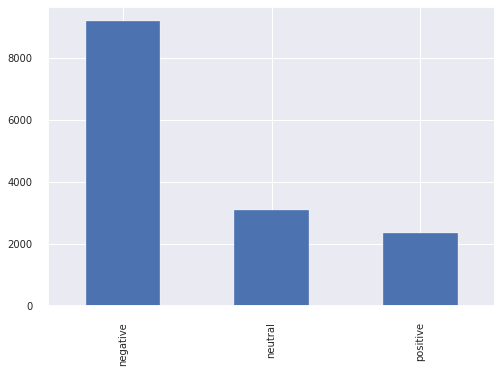

In [13]:
print(df_tweets["airline_sentiment"].value_counts())

df_tweets["airline_sentiment"].value_counts().plot(kind="bar")

### Observation by Sanjib:

1. The "airline_sentiment" is likely to be the target variable, we'll confirm with futher EDA. The variable "airline_sentiment" does not have any missing value.

In [14]:
df_tweets["airline_sentiment"].value_counts(normalize=True)

negative   0.6269
neutral    0.2117
positive   0.1614
Name: airline_sentiment, dtype: float64

# 2. Exploratory Data Analysis:

In [15]:
%%time
df_tweets.profile_report(title="Pandas Profiling of Tweet Data")


CPU times: user 30.1 ms, sys: 1.27 ms, total: 31.4 ms
Wall time: 30.6 ms


Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
print("Mininum tweet_created =",min(pd.to_datetime(df_tweets["tweet_created"])),
      "Maximum tweet_created =", max(pd.to_datetime(df_tweets["tweet_created"])))

Mininum tweet_created = 2015-02-16 23:36:05-08:00 Maximum tweet_created = 2015-02-24 11:53:37-08:00


In [17]:
%%time

column_categories = ["airline", 
                     "retweet_count",
                     "user_timezone", 
                     "name",
                     "negativereason",
                     "tweet_location", 
                      ]

for col in column_categories:
    print("="*40, col)
    print(df_tweets[col].value_counts() )



======================================== airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64
======================================== retweet_count
0     13873
1       640
2        66
3        22
4        17
5         5
7         3
6         3
22        2
8         1
32        1
9         1
31        1
18        1
15        1
28        1
44        1
11        1
Name: retweet_count, dtype: int64
======================================== user_timezone
Eastern Time (US & Canada)     3744
Central Time (US & Canada)     1931
Pacific Time (US & Canada)     1208
Quito                           738
Atlantic Time (Canada)          497
Mountain Time (US & Canada)     369
Arizona                         229
London                          195
Alaska                          108
Sydney                          107
Hawaii                          104
Amsterdam                    

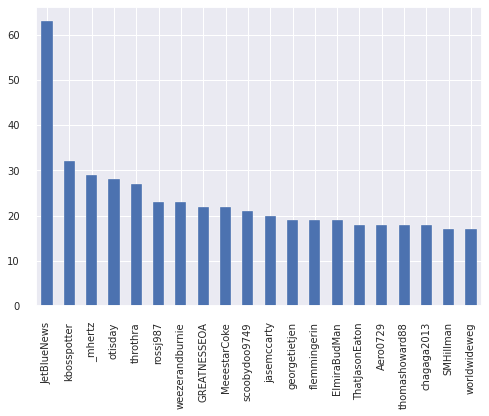

In [18]:
# top 20 users by number of tweets
df_tweets["name"].value_counts().head(20).plot(kind="bar")

### Observation by Sanjib:
1. The JetBlueNews mention (name) looks like sponsored by company, and would never tweet negative sentiment.


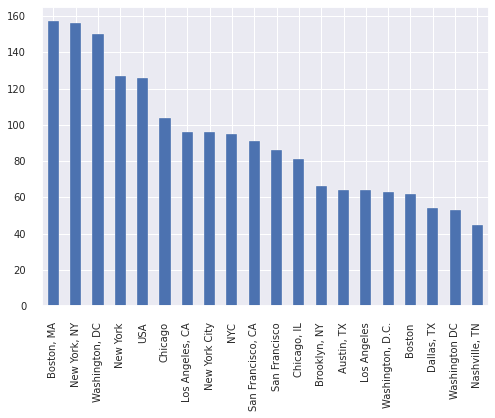

In [19]:
# top 20 locations by number of tweets
df_tweets["tweet_location"].value_counts().head(20).plot(kind="bar")

In [20]:
df_pivot = pd.pivot_table(
    data=df_tweets ,
    columns="airline",
    index="negativereason",
    values="tweet_id",
    aggfunc=np.count_nonzero,
)
df_pivot

airline                      American  Delta  Southwest  US Airways  United  \
negativereason                                                                
Bad Flight                    87        64     90        104         216      
Can't Tell                   198       186    159        246         379      
Cancelled Flight             246        51    162        189         181      
Customer Service Issue       768       199    391        811         681      
Damaged Luggage               12        11     14         11          22      
Flight Attendant Complaints   87        60     38        123         168      
Flight Booking Problems      130        44     61        122         144      
Late Flight                  249       269    152        453         525      
Lost Luggage                 149        57     90        154         269      
longlines                     34        14     29         50          48      

airline                      Virgin America  
negativereason                               
Bad Flight                   19              
Can't Tell                   22              
Cancelled Flight             18              
Customer Service Issue       60              
Damaged Luggage               4              
Flight Attendant Complaints   5              
Flight Booking Problems      28              
Late Flight                  17              
Lost Luggage                  5              
longlines                     3

In [21]:
df_pivot = pd.pivot_table(
    data=df_tweets ,
    columns="retweet_count",
    index="negativereason",
    values="tweet_id",
    aggfunc=np.count_nonzero,
)
df_pivot

retweet_count                0          1        2       3      4      5      \
negativereason                                                                 
Bad Flight                    541.0000  35.0000  2.0000 2.0000    nan    nan   
Can't Tell                  1,099.0000  74.0000  4.0000 5.0000 3.0000    nan   
Cancelled Flight              803.0000  33.0000  7.0000 1.0000 2.0000 1.0000   
Customer Service Issue      2,721.0000 166.0000 17.0000 3.0000 3.0000    nan   
Damaged Luggage                72.0000   1.0000     nan    nan 1.0000    nan   
Flight Attendant Complaints   442.0000  35.0000  3.0000 1.0000    nan    nan   
Flight Booking Problems       503.0000  20.0000  3.0000    nan 1.0000 1.0000   
Late Flight                 1,558.0000 102.0000  3.0000    nan 1.0000    nan   
Lost Luggage                  673.0000  49.0000  2.0000    nan    nan    nan   
longlines                     169.0000   9.0000     nan    nan    nan    nan   

retweet_count                7      18     22     31     32     44     
negativereason                                                         
Bad Flight                     nan    nan    nan    nan    nan    nan  
Can't Tell                  1.0000 1.0000 1.0000 1.0000 1.0000    nan  
Cancelled Flight               nan    nan    nan    nan    nan    nan  
Customer Service Issue         nan    nan    nan    nan    nan    nan  
Damaged Luggage                nan    nan    nan    nan    nan    nan  
Flight Attendant Complaints    nan    nan    nan    nan    nan    nan  
Flight Booking Problems     1.0000    nan    nan    nan    nan    nan  
Late Flight                    nan    nan    nan    nan    nan 1.0000  
Lost Luggage                   nan    nan    nan    nan    nan    nan  
longlines                      nan    nan    nan    nan    nan    nan

In [22]:
# df_pivot*100.0/df_tweets.shape[0]



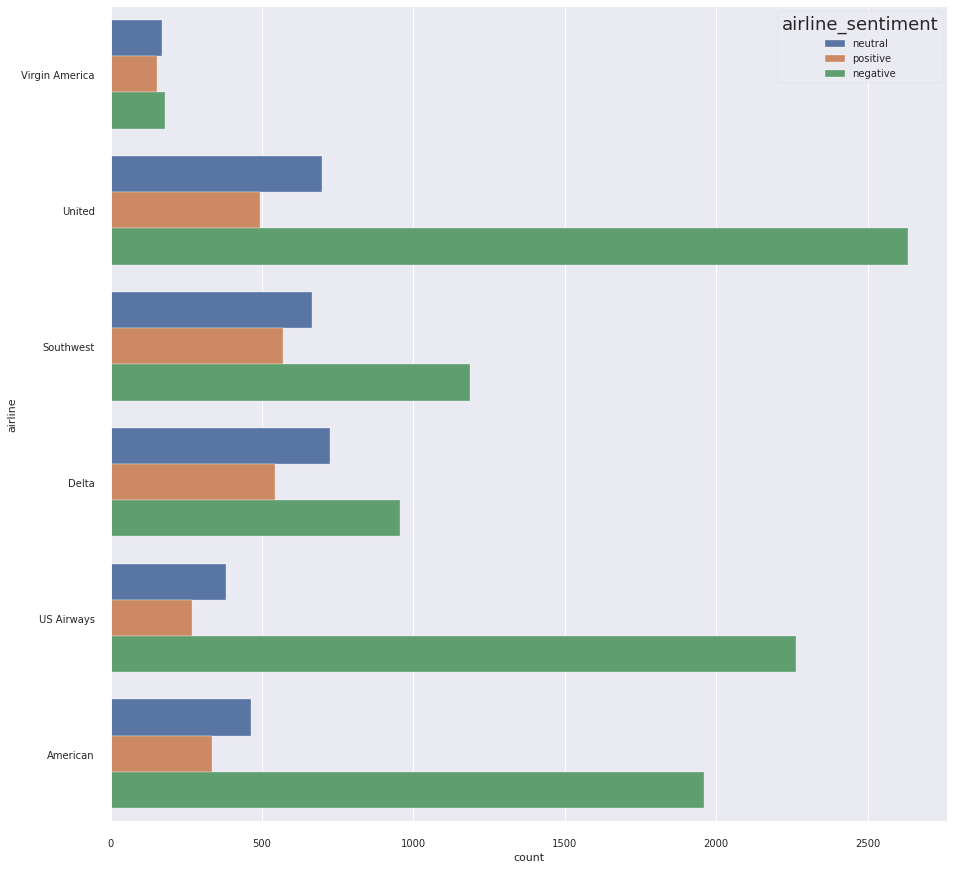

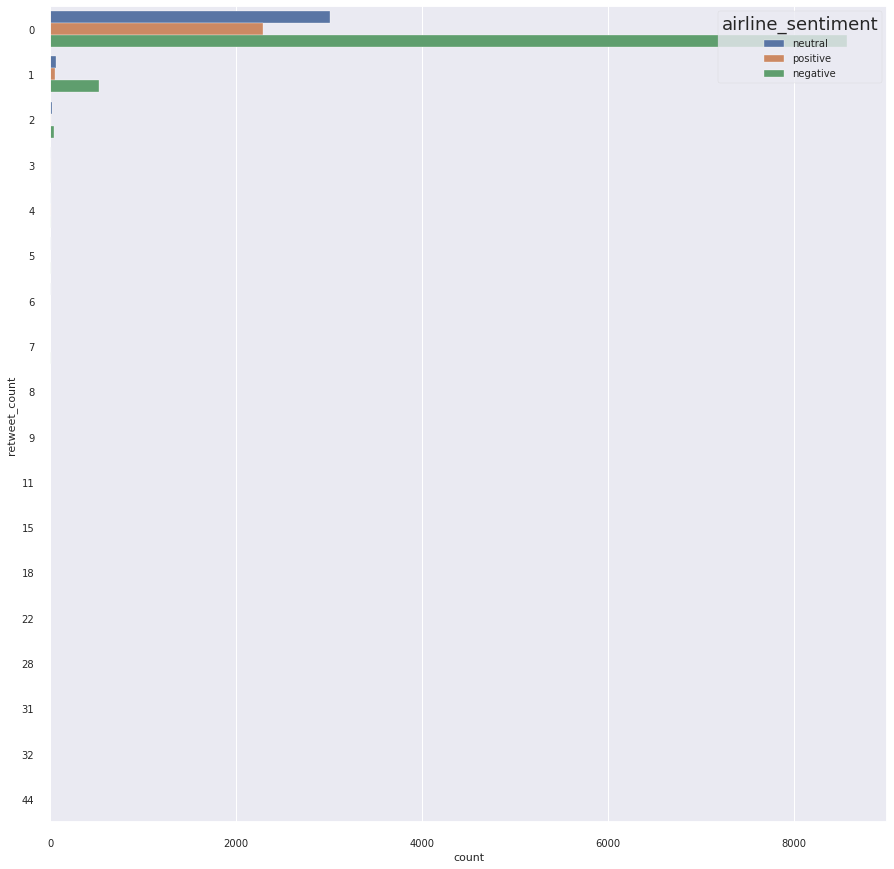

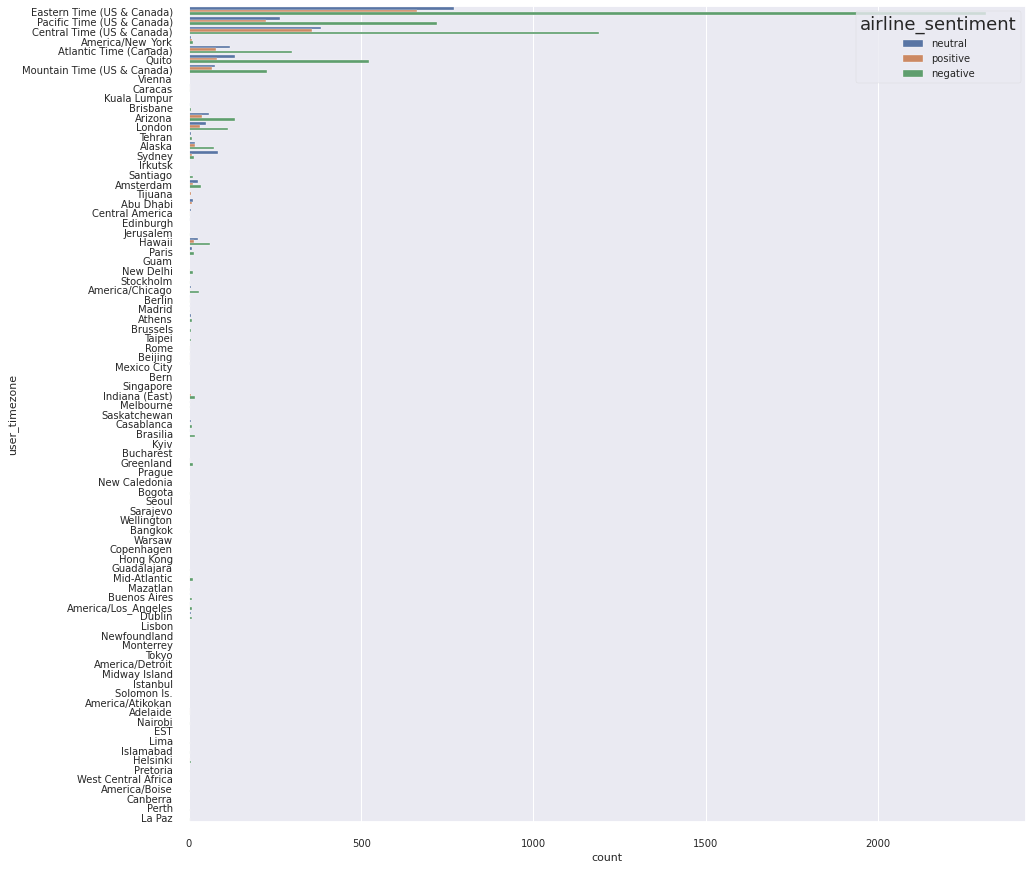

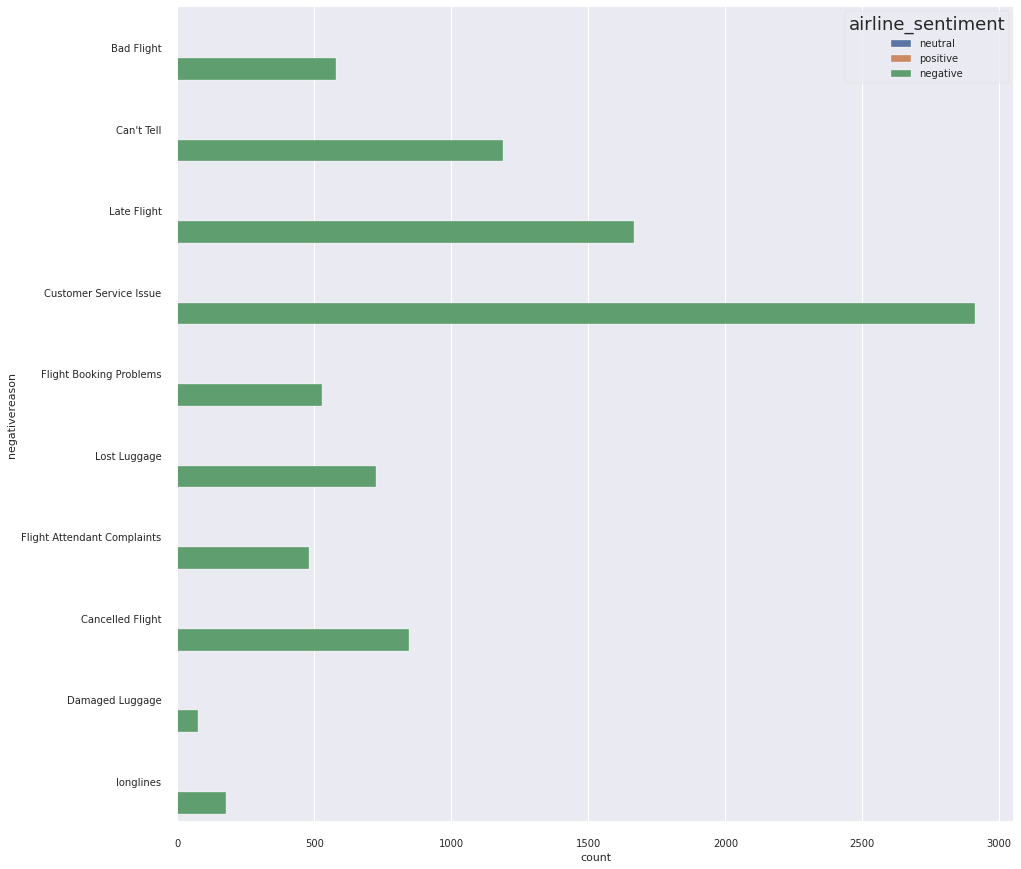

CPU times: user 2.52 s, sys: 98.9 ms, total: 2.62 s
Wall time: 2.58 s


In [23]:
%%time

column_categories = ["airline", 
                     "retweet_count",
                     "user_timezone", 
                     "negativereason"
                    #  "name",
                    #  "tweet_location", 
                      ]

for col in column_categories:
  plt.figure(figsize=(15,15))
  sns.countplot(data=df_tweets,
              # y="tweet_id",
              y=col,
              hue="airline_sentiment"
              )
  plt.show()

In [24]:
df_pivot = pd.pivot_table(
    data=df_tweets ,
    columns="airline_sentiment",
    index="retweet_count",
    values="tweet_id",
    aggfunc=np.count_nonzero,
)
df_pivot

airline_sentiment  negative   neutral    positive 
retweet_count                                     
0                 8,581.0000 3,005.0000 2,287.0000
1                   524.0000    63.0000    53.0000
2                    41.0000    16.0000     9.0000
3                    12.0000     7.0000     3.0000
4                    11.0000     2.0000     4.0000
5                     2.0000     2.0000     1.0000
6                        nan     2.0000     1.0000
7                     2.0000        nan     1.0000
8                        nan        nan     1.0000
9                        nan        nan     1.0000
11                       nan        nan     1.0000
15                       nan     1.0000        nan
18                    1.0000        nan        nan
22                    1.0000        nan     1.0000
28                       nan     1.0000        nan
31                    1.0000        nan        nan
32                    1.0000        nan        nan
44                    1.0000        nan        nan

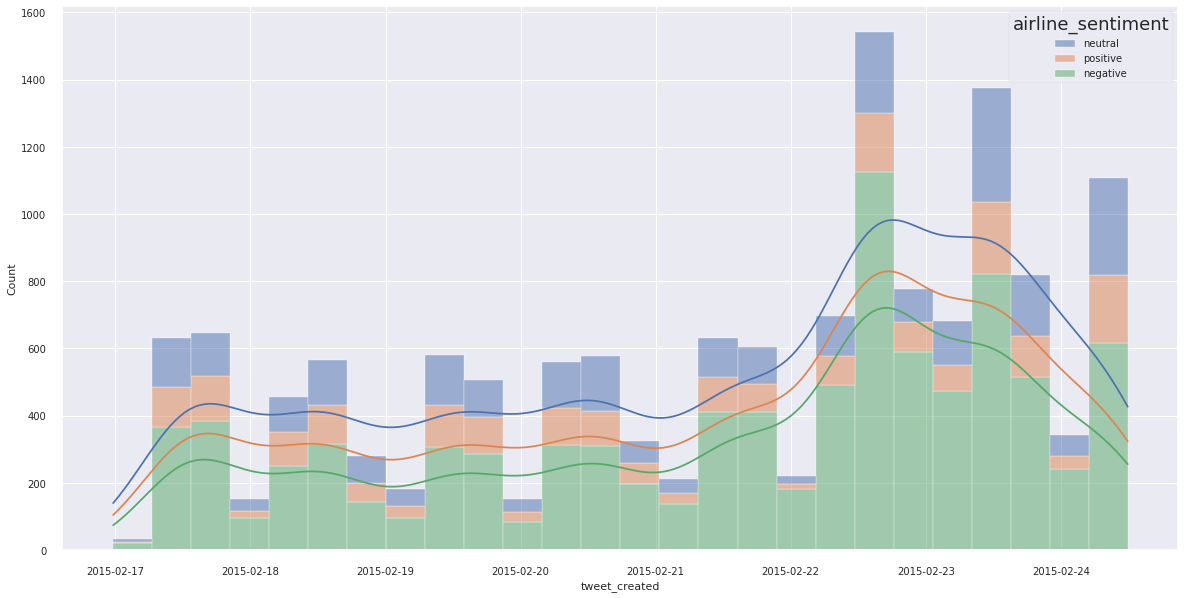

In [25]:
plt.figure(figsize=(20,10))

sns.histplot(data=df_tweets,
            bins="auto",
            x=pd.to_datetime(df_tweets["tweet_created"]),
            hue="airline_sentiment",
            multiple="stack",
            kde=True
            )

plt.show()

In [26]:
datetime(2015,2,23).strftime("%A")
# pd.Timestamp("2015-02-23").weekday_name

'Monday'

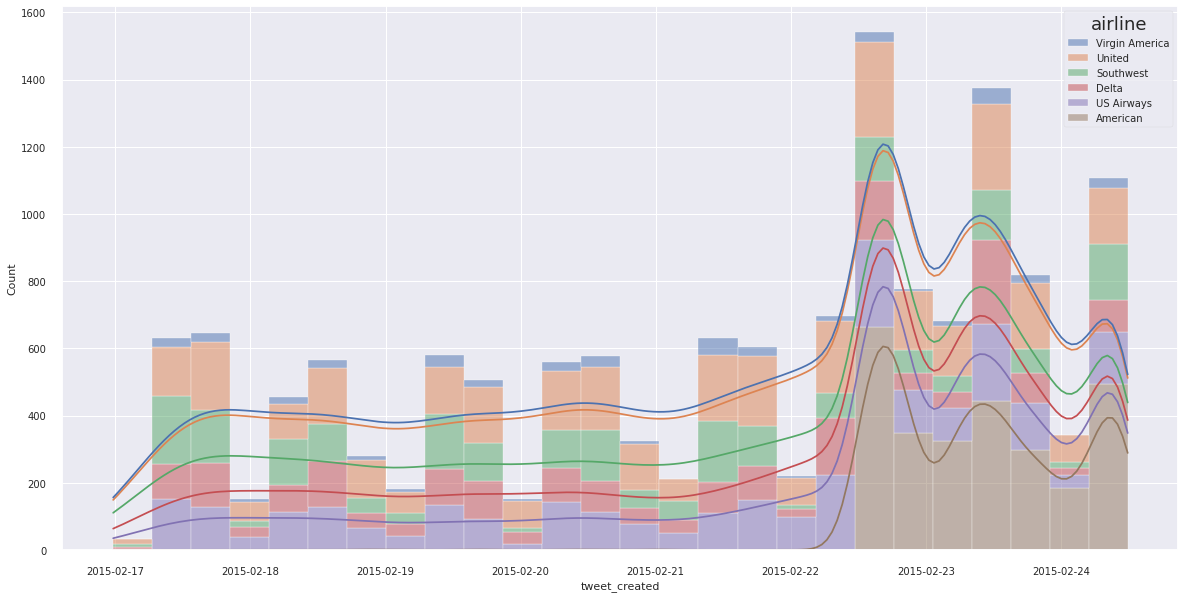

In [27]:
plt.figure(figsize=(20,10))

sns.histplot(data=df_tweets,
            bins="auto",
            x=pd.to_datetime(df_tweets["tweet_created"]),
            hue="airline",
            multiple="stack",
            kde=True
            )

plt.show()

In [28]:
df_tweets["text"].sample(10)

813                                                                                                                            @united I hope so too
12053               @AmericanAir 1hr 46 min. Cost of flight change $788. Was $188 2hrs ago b/f drop call. Cancelled Flighted flight. Asked 4 refund.
5323                                      .@SouthwestAir received an error online and have been on hold for over 1.5 hours. Completely unacceptable.
6199      @SouthwestAir doesn't want to deal with me, but the world might want to know how they are treating their customers: http://t.co/sKKewqhssG
5891                            @SouthwestAir I just received your birthday card.  It was amazing and made me smile with joy.  Nice videos.  Thanks.
11954                                                @AmericanAir Would love to DM you, but my Twitter app says you're not following me and I can't.
6974                                                                                   “@JetBlue: Our flee

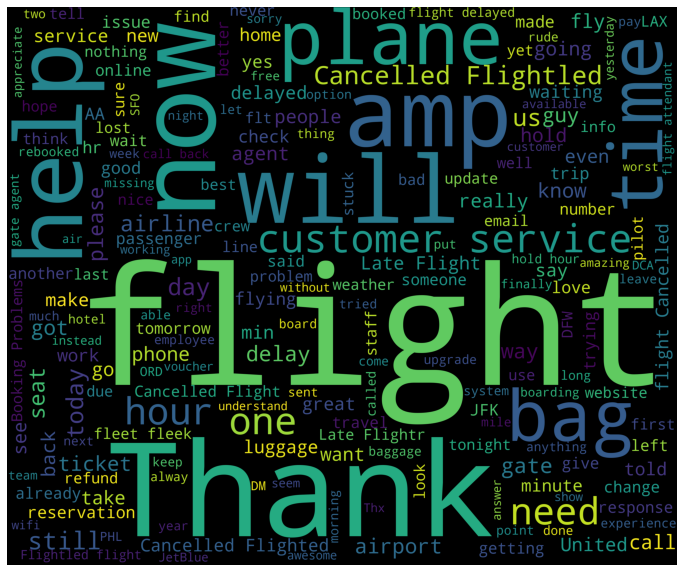

CPU times: user 23.8 s, sys: 334 ms, total: 24.1 s
Wall time: 24 s


In [29]:
%%time

words = ' '.join(df_tweets['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()                     

In [30]:
df_tweets.loc[df_tweets['airline_sentiment']=='negative']

tweet_id           airline_sentiment  airline_sentiment_confidence  \
3      570301031407624196  negative         1.0000                          
4      570300817074462722  negative         1.0000                          
5      570300767074181121  negative         1.0000                          
15     570282469121007616  negative         0.6842                          
17     570276917301137409  negative         1.0000                          
...                   ...               ...                           ...   
14631  569588464896876545  negative         1.0000                          
14633  569587705937600512  negative         1.0000                          
14634  569587691626622976  negative         0.6684                          
14636  569587371693355008  negative         1.0000                          
14638  569587188687634433  negative         1.0000                          

      negativereason           negativereason_confidence airline          \
3                  Bad Flight 0.7033                      Virgin America   
4                  Can't Tell 1.0000                      Virgin America   
5                  Can't Tell 0.6842                      Virgin America   
15                Late Flight 0.3684                      Virgin America   
17                 Bad Flight 1.0000                      Virgin America   
...                       ...                        ...             ...   
14631              Bad Flight 1.0000                            American   
14633        Cancelled Flight 1.0000                            American   
14634             Late Flight 0.6684                            American   
14636  Customer Service Issue 1.0000                            American   
14638  Customer Service Issue 0.6659                            American   

      airline_sentiment_gold name             negativereason_gold  \
3      NaN                           jnardino  NaN                  
4      NaN                           jnardino  NaN                  
5      NaN                           jnardino  NaN                  
15     NaN                    smartwatermelon  NaN                  
17     NaN                      heatherovieda  NaN                  
...                      ...              ...                 ...   
14631  NaN                           MDDavis7  NaN                  
14633  NaN                    RussellsWriting  NaN                  
14634  NaN                      GolfWithWoody  NaN                  
14636  NaN                           itsropes  NaN                  
14638  NaN                         SraJackson  NaN                  

       retweet_count  \
3      0               
4      0               
5      0               
15     0               
17     0               
...              ...   
14631  0               
14633  0               
14634  0               
14636  0               
14638  0               

      text                                                                                                                                                     \
3                              @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse   
4                                                                                                     @VirginAmerica and it's a really big bad thing about it   
5                    @VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA   
15                                                                                                              @VirginAmerica SFO-PDX schedule is still MIA.   
17                  @VirginAmerica  I flew from NYC to SFO last week and couldn't fully sit in my seat due to two large gentleman on either side of me. HELP!   
...                                                                                  

********************************************************************************
****************************** negative


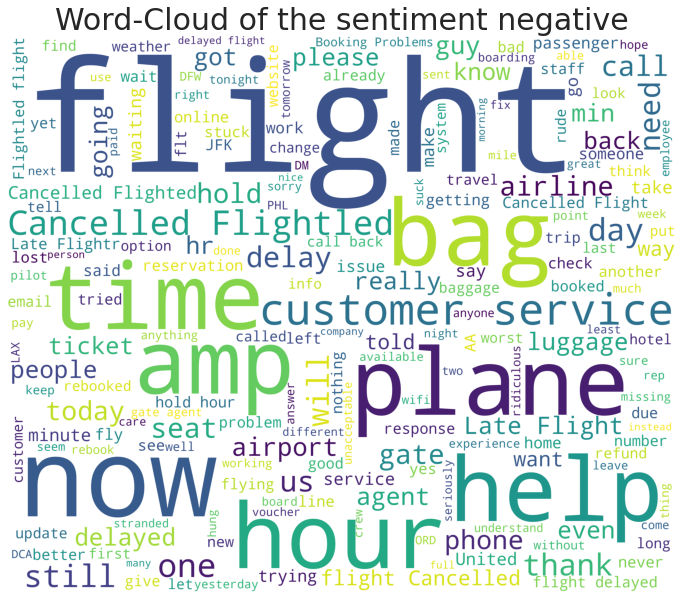

********************************************************************************
****************************** neutral


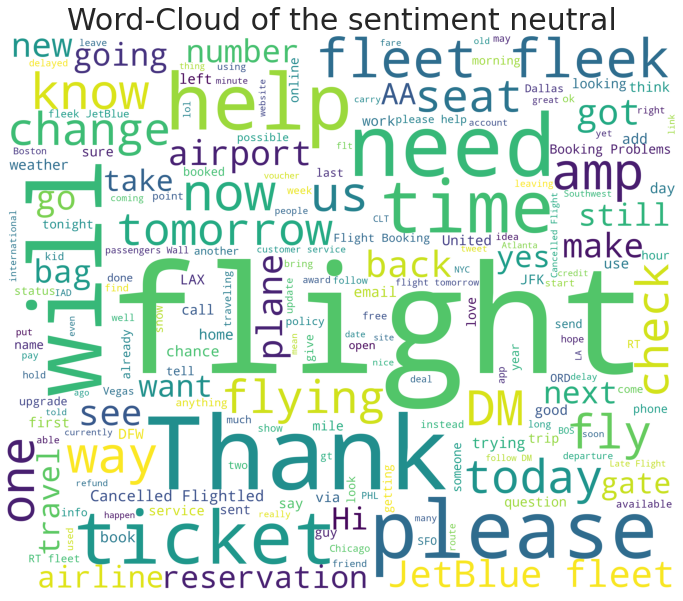

********************************************************************************
****************************** positive


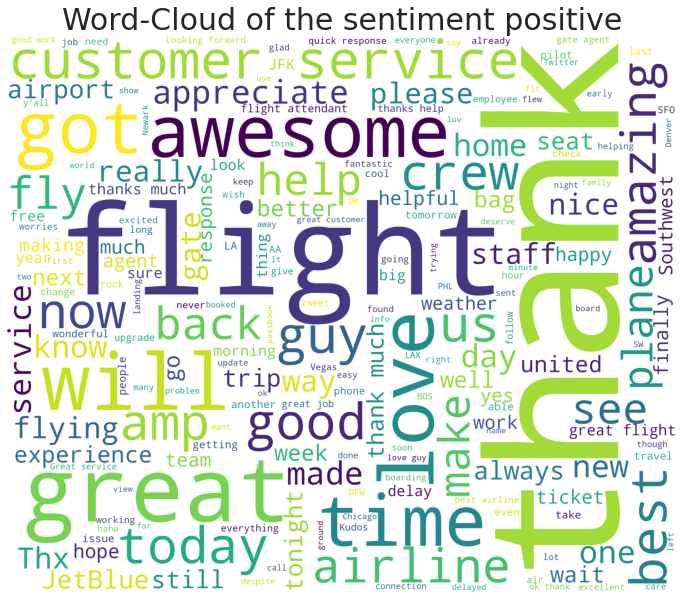

CPU times: user 1min 7s, sys: 1.08 s, total: 1min 8s
Wall time: 1min 8s


In [31]:
%%time
for col_value in list(df_tweets["airline_sentiment"].value_counts().index):
  print("*"*80)
  print("*"*30, col_value)
  words = ' '.join(
      df_tweets.loc[df_tweets['airline_sentiment']==col_value]['text'])
  cleaned_word = " ".join([word for word in words.split()
                              if 'http' not in word
                                  and not word.startswith('@')
                                  and not word.startswith('#')
                              ])
  wordcloud = WordCloud(stopwords=STOPWORDS,
                        background_color='white',
                        width=3000,
                        height=2500
                      ).generate(cleaned_word)

  plt.figure(1,figsize=(12, 12))
  plt.imshow(wordcloud)
  plt.title("Word-Cloud of the sentiment " + col_value,
            fontsize=30)
  plt.axis('off')
  plt.show()   

============================== United


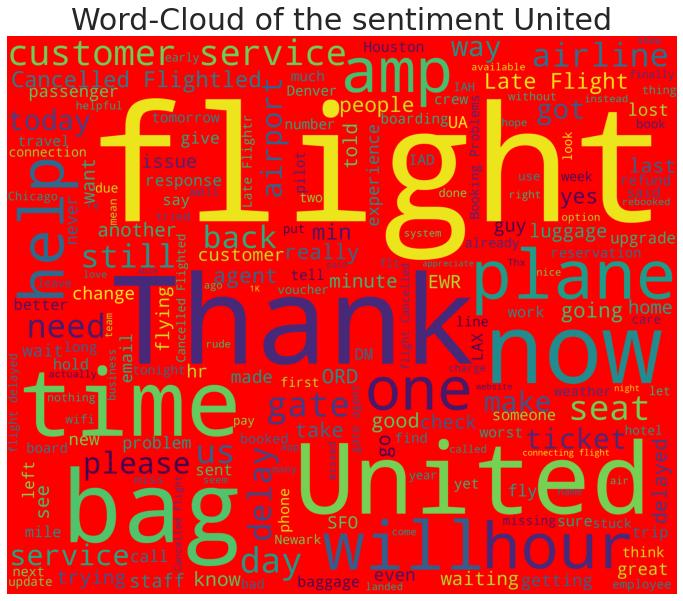

============================== US Airways


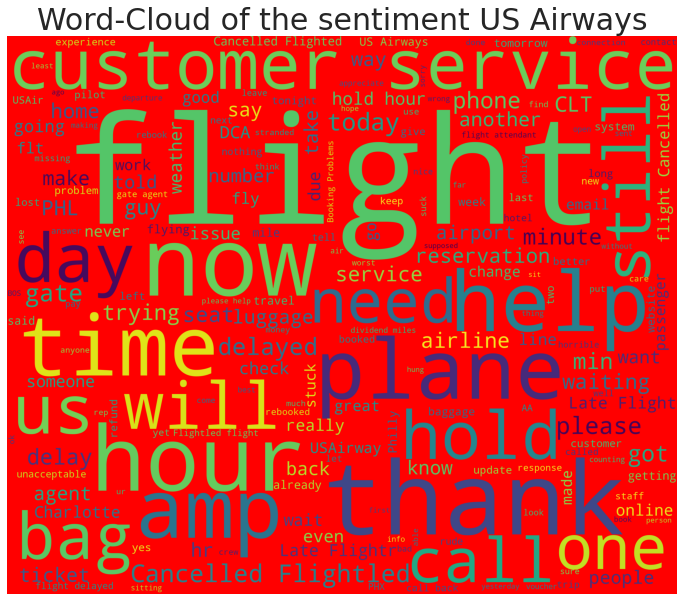

============================== American


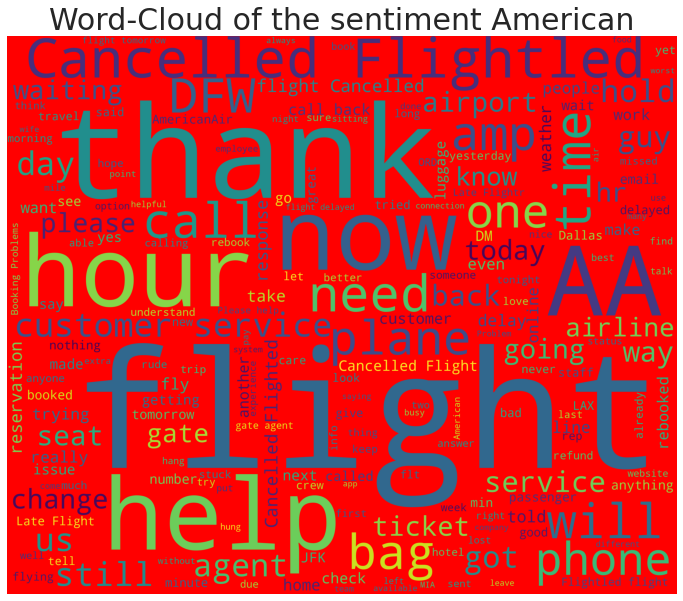

============================== Southwest


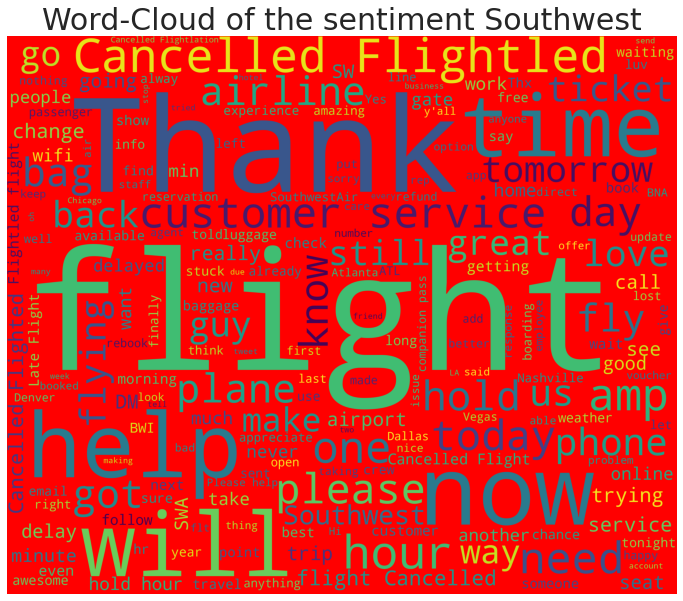

============================== Delta


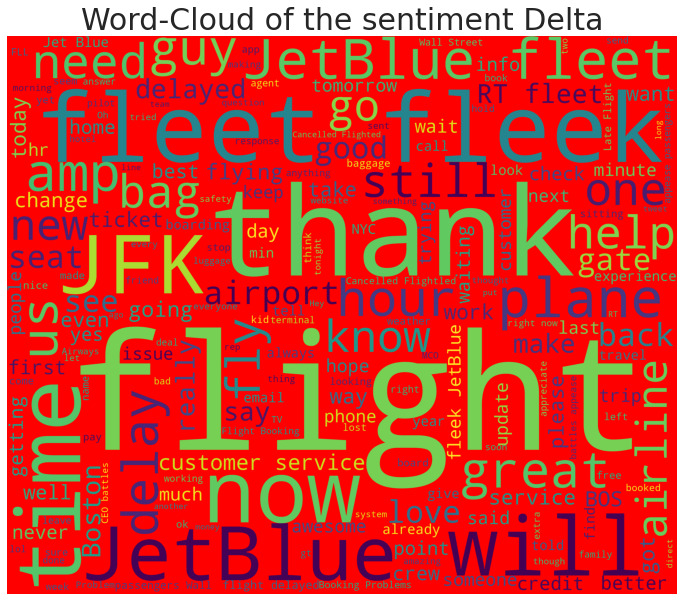

============================== Virgin America


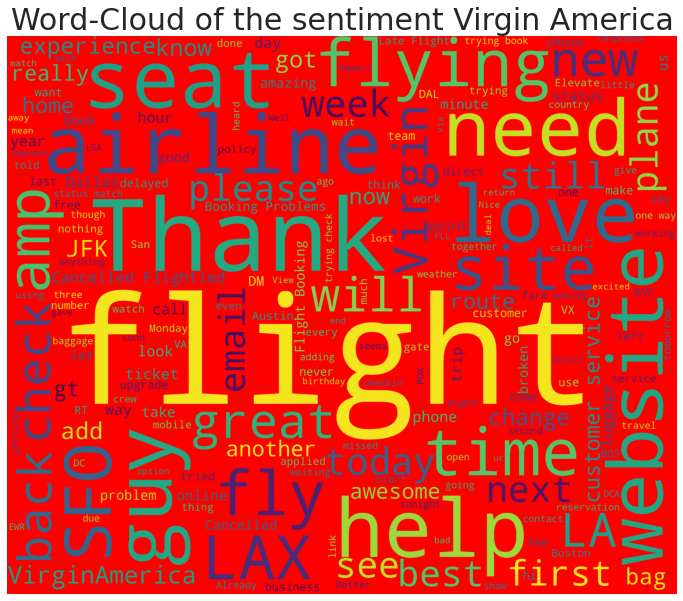

CPU times: user 2min 17s, sys: 2.43 s, total: 2min 19s
Wall time: 2min 19s


In [32]:
%%time
for col_value in list(df_tweets["airline"].value_counts().index):
  print("="*80)
  print("="*30, col_value)
  words = ' '.join(
      df_tweets.loc[df_tweets['airline']==col_value]['text'])
  cleaned_word = " ".join([word for word in words.split()
                              if 'http' not in word
                                  and not word.startswith('@')
                                  and not word.startswith('#')
                              ])
  wordcloud = WordCloud(stopwords=STOPWORDS,
                        background_color='red',
                        width=3000,
                        height=2500
                      ).generate(cleaned_word)

  plt.figure(1,figsize=(12, 12))
  plt.title("Word-Cloud of the sentiment " + col_value,
            fontsize=30)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show() 

In [33]:
Categories_hour = df_tweets["tweet_created"].apply(lambda x : pd.Timestamp(x).hour)
Categories_hour

0        11
1        11
2        11
3        11
4        11
         ..
14635    12
14636    11
14637    11
14638    11
14639    11
Name: tweet_created, Length: 14640, dtype: int64

In [34]:
Categories_hour = Categories_hour.value_counts().sort_index(ascending=False)
Categories_hour

23     193
22     292
21     430
20     602
19     675
18     751
17     754
16     734
15     788
14     927
13     900
12     824
11     986
10     962
9     1013
8      926
7      776
6      621
5      477
4      368
3      225
2      174
1      111
0      131
Name: tweet_created, dtype: int64

Text(0.5, 1.0, 'Proportion of tweets for each hour of the day')

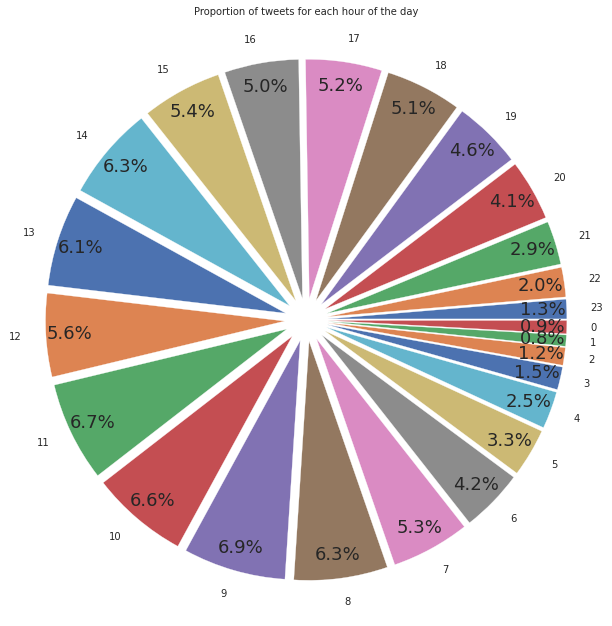

In [35]:
pie, ax = plt.subplots(figsize=[20,11])
# labels = Category.keys()
plt.pie(x=Categories_hour, 
        autopct="%.1f%%", 
        explode=[0.09]*24, 
        labels=Categories_hour.keys(), 
        pctdistance=0.9)
plt.title("Proportion of tweets for each hour of the day", fontsize=10)

In [36]:
df_tweets["word_count"] = [len(t.split()) for t in df_tweets["text"]]
df_tweets["word_count"].describe().T

count   14,640.0000
mean        17.6534
std          6.8823
min          2.0000
25%         12.0000
50%         19.0000
75%         23.0000
max         36.0000
Name: word_count, dtype: float64

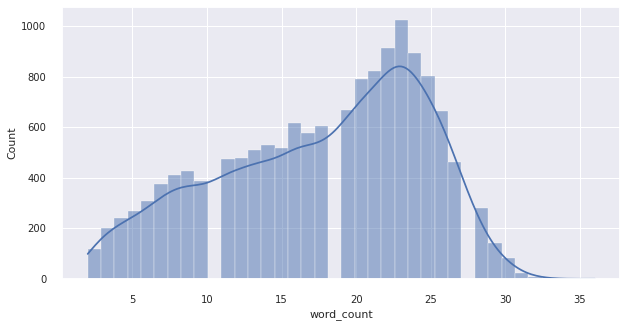

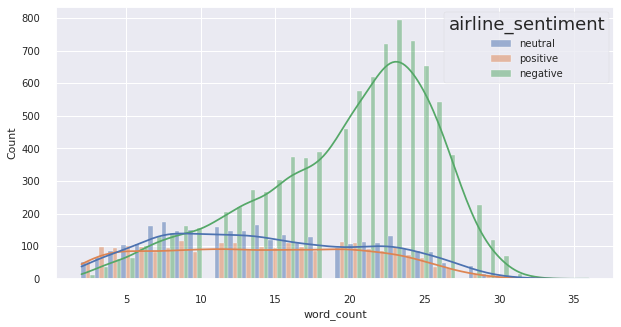

<Figure size 720x360 with 0 Axes>

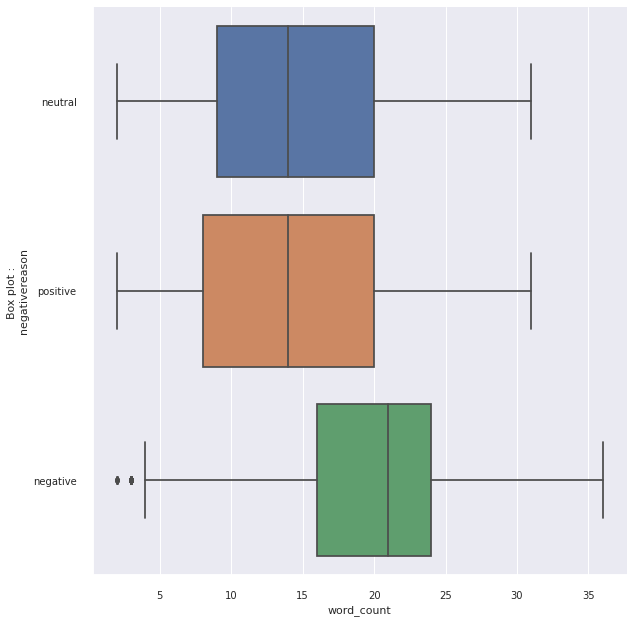

In [37]:
# distribution of data on word_count


plt.figure(figsize=(10,5))
sns.histplot(data=df_tweets,
            #  hue="airline_sentiment",
             x="word_count",
             kde=True,
             multiple="dodge")
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(data=df_tweets,
             hue="airline_sentiment",
             x="word_count",
             kde=True,
             multiple="dodge")
plt.show()

plt.figure(figsize=(10,5))
sns.catplot(data=df_tweets, 
            y="airline_sentiment", 
            x="word_count", 
            height=9, 
            kind="box")
plt.ylabel("Box plot : \n" + col)
plt.show()

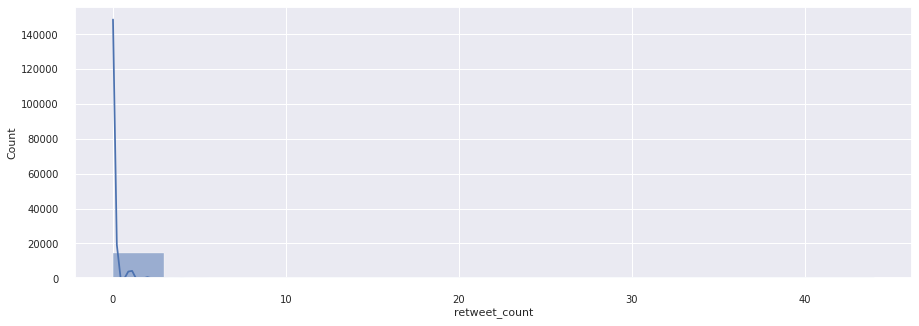

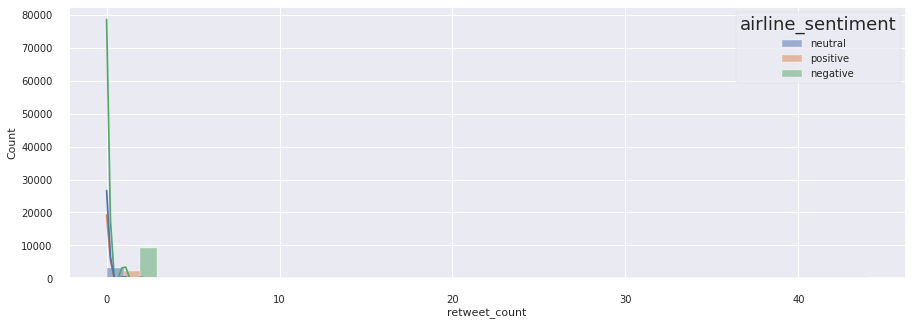

<Figure size 1080x360 with 0 Axes>

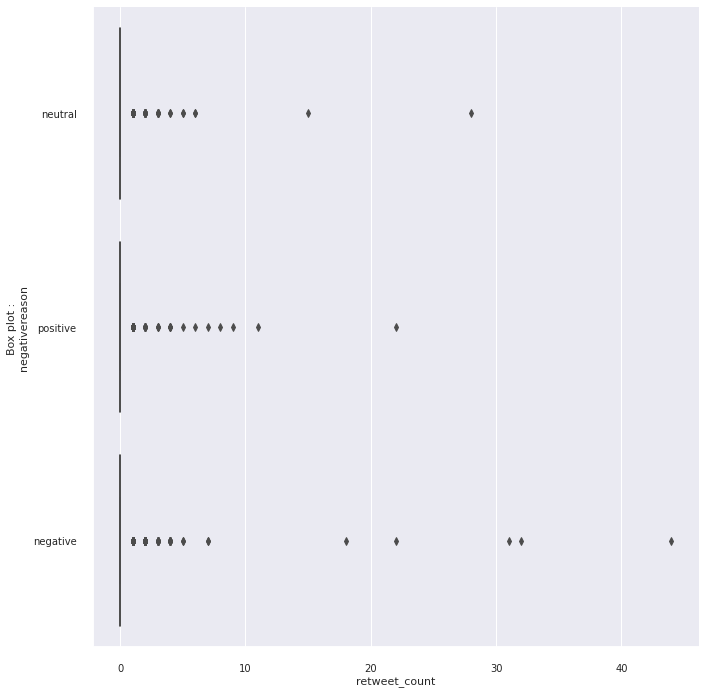

In [38]:
# distribution of data on retweet_count

plt.figure(figsize=(15,5))
sns.histplot(data=df_tweets,
            #  hue="airline_sentiment",
             x="retweet_count",
             kde=True,
             multiple="dodge")
plt.show()

plt.figure(figsize=(15,5))
sns.histplot(data=df_tweets,
             hue="airline_sentiment",
             x="retweet_count",
             kde=True,
             multiple="dodge")
plt.show()

plt.figure(figsize=(15,5))
sns.catplot(data=df_tweets, 
            y="airline_sentiment", 
            x="retweet_count", 
            height=10, 
            kind="box")
plt.ylabel("Box plot : \n" + col)
plt.show()

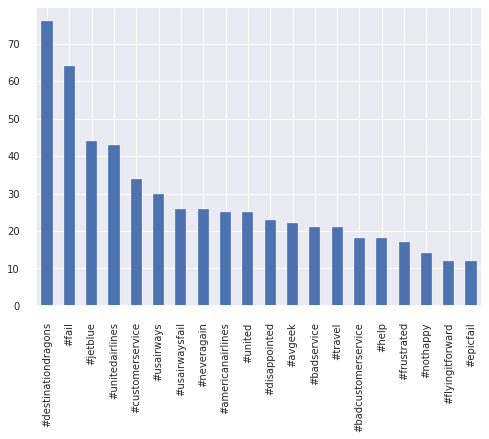

In [39]:
# top 20 occuring hashtags 
words = ' '.join(df_tweets['text'])

list_hashtags = [ x.lower() for x in words.split() if x.startswith("#")\
                    and x not in ["#"]]
pd.Series(list_hashtags, 
          index=None).value_counts(sort=True).head(20).plot(kind="bar")

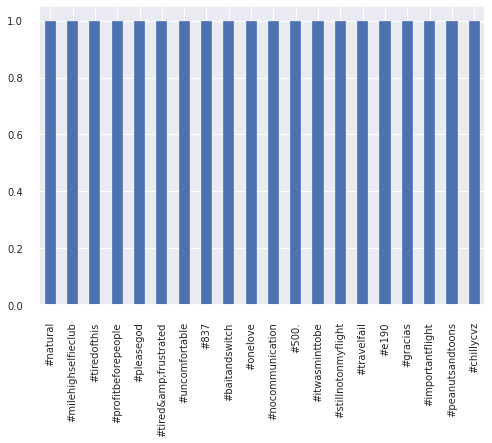

In [40]:
# rare 20 hashtags
pd.Series(list_hashtags, 
          index=None).value_counts(sort=True).tail(20).plot(kind="bar")

In [41]:
# all hashtags, including repeatitions
str_hashtags = " ".join(list_hashtags)
str_hashtags

'#fabulous #seductive #stress #29daystogo #fail #vx358 #noair #worstflightever #roasted #sfotobos #sendambien #andchexmix #moodlitmonday #sciencebehindtheexperience #moodlitmonday #travelhelp #elevategold #tribute #soundofmusic #oscars2015 #guiltypleasures #carrieunderwood #cmfat35000feet #neverflyvirginforbusiness #inflight #flightattendant #dreampath #neverflyvirgin #change #nomorevirgin #uncomfortable #sfo2lax #sneaky #customerservice #virginamerica #flying #sarcasm #cheapflights #farecompare #cheapflights #farecompare #cheapflights #farecompare #cheapflights #farecompare #phl #pleasecomeback #vabeatsjblue #oscars2015 #likingyoulessandless #oscars #redcarpet #oscars #oscars2015 #frustrated #lame #irmafromdallas #princesshalf #flight #dc #sunset #globe #backtowinter #work! #refreshed #redwineisbetter #emirates #baggageissues #smh #southwestair #flights #disappointed #elevate #gold #worst #flight #americanairlines #disappointed. #expected #beatstheothers #seriously #soreback #diehardv

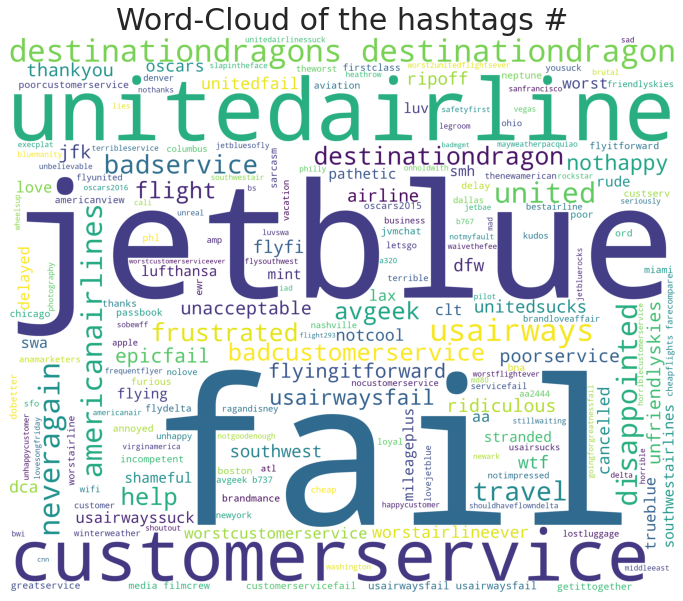

CPU times: user 20.7 s, sys: 307 ms, total: 21 s
Wall time: 20.9 s


In [42]:
%%time
wordcloud = WordCloud(
                      background_color='white',
                      width=3000,
                      height=2500
                    ).generate(str_hashtags)

plt.figure(1,figsize=(12, 12))
plt.title("Word-Cloud of the hashtags #",
          fontsize=30)
plt.imshow(wordcloud)
plt.axis('off')
plt.show() 

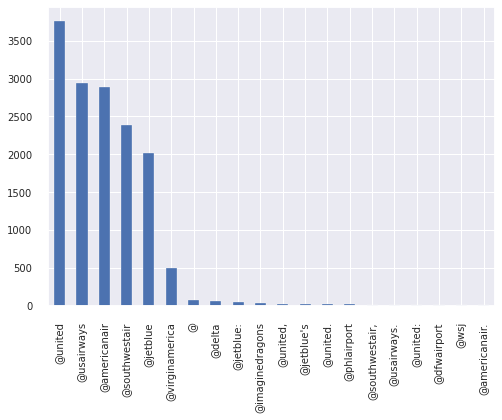

In [43]:
# top 20 occuring mentions  
# words = ' '.join(df_tweets['text'])

list_mentions = [ x.lower() for x in words.split() if x.startswith("@")]
pd.Series(list_mentions, 
          index=None).value_counts(sort=True).head(20).plot(kind="bar")

# 3. Data Pre-Processing

The "text" feature would be used for Sentiment analysis on target variable "airline_sentiment"


From Rubiric,

Each text pre-processing step should be mentioned in the notebook separately. a. Html tag removal. b. Tokenization. c. Remove the numbers. d. Removal of Special Characters and Punctuations. e. Removal of stopwords f. Conversion to lowercase. g. Lemmatize or stemming. h. Join the words in the list to convert back to text string in the data frame. (So that each row contains the data in text format.) i. Print the first 5 rows of data after pre-processing.

In [44]:
# make a copy of dataset, 
# keeping only relevant features containing information 
df_data = df_tweets[["text","airline_sentiment"]]
df_data

text                                                                                                                                                     \
0                                                                                                                         @VirginAmerica What @dhepburn said.   
1                                                                                    @VirginAmerica plus you've added commercials to the experience... tacky.   
2                                                                                     @VirginAmerica I didn't today... Must mean I need to take another trip!   
3                              @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse   
4                                                                                                     @VirginAmerica and it's a really big bad thing about it   
...                                                                                                                                                       ...   
14635                                                                                         @AmericanAir thank you we got on a different flight to Chicago.   
14636  @AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc   
14637                                                                                            @AmericanAir Please bring American Airlines to #BlackBerry10   
14638                 @AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??   
14639              @AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?   

      airline_sentiment  
0       neutral          
1      positive          
2       neutral          
3      negative          
4      negative          
...                 ...  
14635  positive          
14636  negative          
14637   neutral          
14638  negative          
14639   neutral          

[14640 rows x 2 columns]

In [45]:
df_data.sample(20)

text                                                                                                                                                     \
602                                                                                                                                     @united dm these nuts   
954                                                             @united but if i tweet the ID number, won't that reveal my home address to anyone on the web?   
11084                .@USAirways I guess from now on I should take my chances &amp; keep the $50 for the courtesy free because it seems cabin is always full.   
10959                     @USAirways today's flight to Philadelphia.  It's a little disappointing for the unnecessary delays and it's not even snowing in FL.   
8884                                                                                                                                    @JetBlue Great thanks   
12219                                                   “@AmericanAir: Bet these birds wish they'd flown south for the #winter... http://t.co/tY9C0Gae2o” Lol   
12431                                                @AmericanAir and @CVGairport get it together, perfect combination for delays and Cancelled Flightlations   
12417              Thanks, @chasefoster. Was just about to book a flight to UK using @AmericanAir, but after reading this exchange, there's no way. I've sent   
5505                                                   @SouthwestAir is the contest over for Destination Dragons? I want to try to do everything I can to go.   
13913                                 @AmericanAir it that you say is going to help us? Give me a number to call that isn't a recording w a 2 hour wait time!   
7119                                                                                                                             delete your account @JetBlue   
9571       @USAirways you would rather a while plane get exposed to a nasty contagious virus then work wth me to get my flight changed to a Late Flightr date   
7457                                                                                                                     @JetBlue 118 to Boston still sitting   
2188   @United - flight Cancelled Flightled. 4 hrs at airport to book a new one for $95. Just got two invoices for the flight, each for approx $300. Really?!   
7488                                                                             @JetBlue I'm over that honestly just would like to get going on the journey.   
12389                 @AmericanAir  They said it works 80-90% of the time, DFW security entrance C26. Before/after pre-check, whereas I paid for the service.   
3120                                                      @united I am so happy I found my phone because this is easily the worst system I have ever heard of   
5654                                                   @SouthwestAir delay is understandable but look at the time of the the flight and boarding time. Weird!   
9995                   @USAirways @AmericanAir seriously with all the service issues you are having right now this is what you decide to tweet?? Unbelievable   
7566                   @JetBlue don't think any1 rly knows what's goin on. supposed 2 leave at 8:30a then 9a then 9:30a then 10a then 11a then 11:30a. Now 12   

      airline_sentiment  
602     neutral          
954    negative          
11084  negative          
10959  negative          
8884   positive          
12219   neutral          
12431   neutral          
12417   neutral          
5505    neutral          
13913  negative          
7119   negative          
9571   negative          
7457   negative          
2188   negative          
7488   negative          
12389   neutral          
3120   negative          
5654   negative          
9995   negative          
7566   negative

### Observation by Sanjib:

Following pre-processing of text are required:


1. Replace contractions in string (e.g. replace "I'm" with "I am")

2. Remove : (They do not contribute to sentiments)

  2.1 Remove HTML Tags.
  
  2.2 Remove numbers.

  2.3 Remove tags starting with '@', '$'. 
  
  (Note: Some hashtags starting with '#' contains sentiments, as we observed during EDA)

  2.4 Removal of URL’s.

  2.5 Removal of Punctuations.
  

3. Replacement:

  3.1 Replace the emoji with words, which are meaningful to sentiment. Examples, 👎	
   
  3.2 Replace emojicons (e.g. :>, :-< ) with meaningful words>  
  
4. Removal of non-ASCII characters.
    
5. Conversion of all characters to lowercase.

6. Tokenize text. Remove Stopwords. Before removing shortlist the stopwords that are meaningful to determine sentiment.

7. Spelling Correction. (Note: Tweets have usually spelling mistakes)

8. Lemmatize text. (preffered over stemming)



## 3.1 Toeknization

Followed by WordCloud Visualization

In [46]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [47]:
nltk.word_tokenize(
    "I've tried both desktop and mobile, :-() http://t.co/AvyqdMpi1Y.	negative 😭😭	")

# df_clean_tweet['clean_text'] = df_clean_tweet.apply(lambda row: nltk.word_tokenize(row['clean_text']), 
#                                                  axis=1) # Tokenization of data
# df_clean_tweet                                                 

['I',
 "'ve",
 'tried',
 'both',
 'desktop',
 'and',
 'mobile',
 ',',
 ':',
 '-',
 '(',
 ')',
 'http',
 ':',
 '//t.co/AvyqdMpi1Y',
 '.',
 'negative',
 '😭😭']

### Observation by Sanjib:

  1. The tokenization breaks an URL. Entire URL needs to be removed, because URL contains no information regarding sentiment classification.



## 3.2 Normalization

In [48]:
%%time

# Spelling Correction: unit testing the libray with one smaple, 
str(TextBlob(
"I'll book my next Christmas vacatinn this Deceber any other ways you want to devalue mileage plus."
).correct())


CPU times: user 378 ms, sys: 3.92 ms, total: 382 ms
Wall time: 382 ms


"I'll book my next Christmas vacation this December any other ways you want to value mileage plus."

###Observation by Sanjib:

  1. The spelling check operation comsumes significant time. This needs to be performed after words are removed.

In [49]:
# emoji
%%time
# import emoji
emoji.demojize("united :-( customer service 👎", delimiters=("",""))

CPU times: user 73 ms, sys: 46 µs, total: 73.1 ms
Wall time: 72.5 ms


'united :-( customer service thumbs_down'

In [50]:
%%time 
text = "@United I am delighted ✈️ 😃 👍"
print (emoji.demojize( text,  delimiters=("","")) )

@United I am delighted airplane grinning_face_with_big_eyes thumbs_up
CPU times: user 656 µs, sys: 34 µs, total: 690 µs
Wall time: 604 µs


In [51]:
%%time
def replace_emojicons(str_p : str):
    """
      Desc: Replace following emoticons with meaningful
            words - happy, disgusting, surprise  
      Params:
        str_p : str = string where to replace
      Returns:
        str = string after replace
    """    
    # start_time = datetime.now()

    ##
    for ch in [":)", ":):)", ":-)", ":-))", ":-3", ":3"
               ":-{)", ":-):-)", ":-]", ":->", ":>", "8)",
               "8-)", ":-}", ":}", ":o)", "=3", "B^D", 
               ":c)", "c:", ":c)" "C:", ":^)", "=]", "=)",
               ";D", ";>", ";)", ";-)", ";]", ";-]", ";>",
               "O:-)", "O:)", "0:-3", "0:)", "0:-)", "0:)",
               "(^_^)/", "(^O^)／", "(＾ｖ＾)", ";p"]:
      if ch in str_p:
        str_p = str_p.replace(ch, " happy " )

        

    ##
    for ch in [":(", ":(:(", ":-(", ":-c", ":c", ":-<", 
               ":<", ":-[", ":[", ":-[", ":-||", ">:[",  
               ":-{(", ":-(:-(", ":{", ":@", ";(", ":'(",
               ":'-(", ":=(", "D-'", "D:<", "D:", "D8",
               "D;", "D=", "DX", ":S", ":-/", ":/", ">:\\",
               ">:/", ":L", "8====D", "</3", "<\3", "8-X",
               "8=X", "x-3", "x=3"]:
      if ch in str_p:
        str_p = str_p.replace(ch, " disgusting " )

    ##
    for ch in [":O", ":-O", ":o", ":-o", "8-0", ">:O",
               ":0", ":-0", "(@_@)", "(*_*)"]:
      if ch in str_p:
        str_p = str_p.replace(ch, " surprise " )

    # print("replace_emojicons() duration {}".format(
    # datetime.now() - start_time))      

    return str_p


 # unit testing 
replace_emojicons("united :-( customer service 👎")


CPU times: user 14 µs, sys: 0 ns, total: 14 µs
Wall time: 16.7 µs


In [52]:
nltk.download('stopwords')
nltk.download('wordnet')

stopwords = stopwords.words('english')
stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [53]:
%%time

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', 
              "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 
              'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', 
              "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', 
              "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', 
              "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, 
# so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist)) 
stopwords.append("w/")     

lemmatizer = WordNetLemmatizer()



############################################
def lemmatize_list(words):
    """Lemmatize"""
    # start_time = datetime.now()   
    # new_words = []
    # for word in words.split():
    #   new_words.append(" ")
    #   new_words.append(lemmatizer.lemmatize(word, pos='v'))

    new_words = [lemmatizer.lemmatize(word, 
                      pos='v') for word in words.split()]
 
    # print("lemmatize_list() duration = {}".format(
    #   datetime.now() - start_time))     
    return " ".join(new_words)

# Examples : Unit testing
text = "Couldn't make changes online and after 90 mins on hold and time" +\
" dealing w/ the rude rep, the 24 hour window has closed."
print("Testing lemmatize_list :" ,
      lemmatize_list(text) )



Testing lemmatize_list : Couldn't make change online and after 90 mins on hold and time deal w/ the rude rep, the 24 hour window have closed.
CPU times: user 1.46 s, sys: 90 ms, total: 1.55 s
Wall time: 1.52 s


In [54]:
%%time

# Examples : Unit testing
text = "@united I had one interview I was the last person what does that mean?"
print("Testing lemmatize_list :" ,
      lemmatize_list(text) )

Testing lemmatize_list : @united I have one interview I be the last person what do that mean?
CPU times: user 0 ns, sys: 237 µs, total: 237 µs
Wall time: 214 µs


In [55]:
%%time 
text = "united :-( customer service 👎. I am disappointed"
unicodedata.normalize('NFKD', text).encode('ascii', 
          'ignore').decode('utf-8', 'ignore')

CPU times: user 11 µs, sys: 0 ns, total: 11 µs
Wall time: 15.7 µs


In [56]:
%%time

############################################
def strip_html(text):
    # start_time = datetime.now()
    soup = BeautifulSoup(text, "html.parser")  
    # print("remove_numbers duration {}".format(
    # datetime.now() - start_time))                  
    return soup.get_text()

# Examples : Unit testing
text = "<h1>This is my website</h1>"
print("Testing strip_html :" ,
      strip_html(text) )


Testing strip_html : This is my website
CPU times: user 1.16 ms, sys: 0 ns, total: 1.16 ms
Wall time: 803 µs


In [57]:
%%time

# Examples : Unit testing
text = "<h1>This is my website</h1><h2>Details here</h2>"
print("Testing strip_html :" ,
      strip_html(text) )


Testing strip_html : This is my websiteDetails here
CPU times: user 0 ns, sys: 551 µs, total: 551 µs
Wall time: 463 µs


In [58]:


############################################

def remove_numbers(text):
  #remove the numericals present in the text
  # start_time = datetime.now()
  text = re.sub(r'\d+', '', text)
  # print("remove_numbers duration {}".format(
  #     datetime.now() - start_time))
  return text

# Examples : Unit testing
text = "@united A change fee of $200. Same exact flight from ATL-HOU is " +\
"$165. Why a charge of $574? The math doesn't add up."
print("Testing remove_numbers :" ,remove_numbers(text) )

############################################
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    # start_time = datetime.now()

    new_words = unicodedata.normalize('NFKD', 
                      words).encode('ascii', 
                                  'ignore').decode('utf-8', 'ignore')
    # print("remove_non_ascii() duration = {}".format(
    # datetime.now() - start_time))  
    return new_words

# Examples : Unit testing
text = "united :-( customer service 👎"
print("Testing remove_non_ascii() :" ,
      remove_non_ascii(text) )

############################################
# def to_lowercase(words):
#     """Convert all characters to lowercase from list of tokenized words"""
#     new_words = []
#     for word in words.split():
#         new_words.append(" ")
#         new_word = word.lower()
#         new_words.append(new_word)
#     return "".join(new_words)

    
# # Examples : Unit testing
# text = "Flight Crew Availability is to blame? NEVER AGAIN with @United."
# print("Testing to_lowercase :" ,
#       to_lowercase(text) )

############################################
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    # start_time = datetime.now()
    new_words = []
    # for word in words.split():
        # as tweets may not have whitespace along with punctuations always,
        # we are going to add whitespace in place of punctuations 
    new_words = re.sub(r'[^\w\s]', ' ', words)
        # if new_word != ' ':
        #     new_words.append(" ")
        #     new_words.append(new_word)
    # print("remove_punctuation() duration = {}".format(
    # datetime.now() - start_time)) 
    return new_words

# Examples : Unit testing
text = "@united WTF!?!? Delay after delay. 15 hours YVR to SAN? Unacceptable."
print("Testing remove_punctuation() :" ,
      "".join(remove_punctuation(text)) )    

############################################
def remove_stopwords_lower(words):
    """Remove stop words from list of tokenized words"""
    # start_time = datetime.now()

    # new_words = []
    # for word in words.split():
    #     if word not in stopwords:
    #         new_words.append(" ")
    #         new_words.append(word)
    new_words = [word.lower() for word in words.split() \
                    if word not in stopwords]

    # print("remove_stopwords() duration = {}".format(
    # datetime.now() - start_time))         
    return " ".join(new_words)

# Examples : Unit testing
text = "Flight Crew Availability is to blame? NEVER AGAIN with @United."
print("Testing remove_stopwords_lower :" ,
      "".join(remove_stopwords_lower(text)) )



############################################
# # Function for url's
# def remove_urls(text):
#     # url_pattern = re.compile(r'https?://\S+|www\.\S+')
#     # return url_pattern.sub(r'', text)
#     start_time = datetime.now()
#     text = re.sub(
#     'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',
#     '',text)
#     print("remove_urls() duration = {}".format(
#       datetime.now() - start_time))
#     return text

# # Examples : Unit testing
# text = "This is my website. Website is https://to.abc.com"
# print("Testing remove_urls() :" ,remove_urls(text) )


############################################

#expand the contractions

# def replace_contractions(text):
#     """Replace contractions in string of text"""
#     return contractions.fix(text)

# Examples : Unit testing
text = "Couldn't make changes online"
print("Testing replace_contractions :" ,
      contractions.fix(text) )


Testing remove_numbers : @united A change fee of $. Same exact flight from ATL-HOU is $. Why a charge of $? The math doesn't add up.
Testing remove_non_ascii() : united :-( customer service 
Testing remove_punctuation() :  united WTF     Delay after delay  15 hours YVR to SAN  Unacceptable 
Testing remove_stopwords_lower : flight crew availability blame? never again @united.
Testing replace_contractions : could not make changes online


In [59]:
%%time
############################################


def remove_mention_number_dollar_url(text_p : str):
    """
      Description: 
        remove the followings in the tweets
        mention, decimal, integer, dollar-currency, 
        URL, punctuation
    """
    # start_time = datetime.now()

    text_p = re.sub(
    r'@\w+|\d+(\.\d*)?|\$|http[s]?://(?:' +\
    '[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'+\
    '' #'|[^\w\s]' # removing punctuation removed emoji
    ,
    '',text_p)

    # print(
    # "remove_mention_number_dollar_url_punctuation() duration = {}".format(
    #   datetime.now() - start_time))
    return text_p

# Examples : Unit testing
text = "@AmericanAir Please bring American Airlines to #BlackBerry10," +\
" at $0.0. Website is https://to.abc.com @AmericanAir.  😭😭	"
# print(text)
print("Testing remove_mention_number_dollar_url() :", 
      remove_mention_number_dollar_url(text) )

Testing remove_mention_number_dollar_url() :  Please bring American Airlines to #BlackBerry, at . Website is  .  😭😭	
CPU times: user 659 µs, sys: 0 ns, total: 659 µs
Wall time: 577 µs


In [60]:
%%time
# Examples : Unit testing
text = "@AmericanAir Please bring American Airlines to #BlackBerry10," +\
" at $0.0. Website is https://to.abc.com @AmericanAir.  😭😭	"
# print(text)
print("Testing remove_mention_number_dollar_url() :", 
      remove_mention_number_dollar_url(text) )

Testing remove_mention_number_dollar_url() :  Please bring American Airlines to #BlackBerry, at . Website is  .  😭😭	
CPU times: user 149 µs, sys: 7 µs, total: 156 µs
Wall time: 115 µs


In [61]:
%%time
"Here are ABC.".lower()

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs


'here are abc.'

In [62]:
%%time

############################################
def normalize(words):
    """
      Desc: 
        Wrapper function of all text pre-processing
      Params:
        words : str 
      Return:
        str = Cleaned Text  
    """

    """


    1. Replace contractions in string (e.g. replace "I'm" with "I am")

    2. Remove : (They do not contribute to sentiments)

      2.1 Remove HTML Tags.
      
      2.2 Remove numbers.

      2.3 Remove tags starting with '@', '$'. 
      
      (Note: Some hashtags starting with '#' contains sentiments, as we observed during EDA)

      2.4 Removal of URL’s.

      2.5 Removal of Punctuation.
      

    3. Replacement:

      3.1 Spelling Correction. (Note: Tweets have )

      3.3 Replace the emoji with words, which are meaningful to sentiment. Examples, 👎	
      
      3.4 Replace emojicons (e.g. :>, :-< ) with meaningful words>  

      
    4. Removal of non-ASCII characters.
        
    5. Conversion of all characters to lowercase.

    6. Tokenize text. Remove Stopwords. Before removing,
    please shortlist the stopwords that are meaningful to determine sentiment.

    7. Lemmatize text. (preffered over stemming)


    """

    # strip_html



    words = remove_mention_number_dollar_url(words)
    
    # print(words)
    


    words = contractions.fix(words)
    # print(words)
    
    words = remove_stopwords_lower(words)
    # print(words)

    # words = remove_punctuation(words)
    # print(words)
    # words = remove_non_ascii(words)
    # words = unicodedata.normalize('NFKD', words
    #       ).encode('ascii', 
    #       'ignore').decode('utf-8', 'ignore')

    # words = to_lowercase(words)
    # words = words.lower()


    words = emoji.demojize(words, delimiters=(""," "))
    words = replace_emojicons(words)
    # print(words)

    #remove punctuations
    words = re.sub('[^\w\s]','',words) 

    # The spelling correction took long processing time
    # words = str(TextBlob(words).correct())

    words = lemmatize_list(words)
    return words

#Unit testing
print(normalize(
"I've tried both desktop and mobile, :-() http://t.co/AvyqdMpi1Y.	negative 😭😭	"))

i try desktop mobile disgust negative loudly_crying_face loudly_crying_face
CPU times: user 855 µs, sys: 0 ns, total: 855 µs
Wall time: 805 µs


In [63]:
%%time 
#Unit testing
print(normalize(
"I've tried both desktop and mobile, :( http://t.co/AvyqdMpi1Y	negative 😭😭	"))

i try desktop mobile disgust negative loudly_crying_face loudly_crying_face
CPU times: user 466 µs, sys: 24 µs, total: 490 µs
Wall time: 495 µs


In [64]:
%%time 

df_data["clean_text"] = df_data.apply(lambda row: normalize(row["text"]),
                                      axis=1)
df_data

CPU times: user 7.23 s, sys: 30.3 ms, total: 7.26 s
Wall time: 7.23 s


In [65]:
# %%time
# np.vectorize(normalize)(df_data["text"])

In [66]:
# save to disk
df_data.to_csv("/content/drive/MyDrive/Colab Notebooks/tweet-clean.csv",index=True)

In [67]:
df_data.sample(20)

text                                                                                                                                                         \
7829                                                                                          @JetBlue thank you! I'm excited to fly with you for the first time.   
13015                     @AmericanAir After being patient about my "delayed" bags for 5 weeks, I was told that it could take another 3 to 5 weeks. Unacceptable!   
1146                     @united b) I contacted you directly, and the phone service was Laissez Faire at best.  The problem isn't a Cancelled Flightled a flight.   
13983                     @AmericanAir In car gng to DFW. Pulled over 1hr ago - very icy roads. On-hold with AA since 1hr. Can't reach arpt for AA2450. Wat 2 do?   
5231                                                                                            @SouthwestAir coming up on 2hrs on, still haven't spoken to a rep   
13564                  @AmericanAir thinks it's a good cs to get everyone through the gate for flight 4275 then we wait bc plane not ready http://t.co/rxmjWoo7Qi   
1726                                                       @united thanks. Just was able to do it on the app myself. Still not customer service to be seen in YYZ   
2767          @united 5.5 hours Late Flightr I've been in transit for a total of twelve hours...please just change the plane on flight 600 this is ridiculous SFO   
11030                                                                                                                       @USAirways I already HAVE, four times   
5461                                                                                       @SouthwestAir flight to San Diego is delayed per usual.. take me home!   
11445                     @USAirways Yeah I know that...but now I'll have to spend almost 500 dollars more on my ticket since the price has gone up over the week   
11644                                                       @USAirways thanks for your help! I left a message for DCA lost and found. Fingers crossed we find it!   
11404                              @USAirways I have to spend more than the cost of the flight just to get a free room and transportation to and from the airport   
2214                     @united thanks for the reply. To clarify, the airfare is similar to your likely intended peer group. The $3 beer charge, however, is not   
13901  @AmericanAir Need to go frm TPA to MCI tmrw &amp; my connection thru DFW is Cancelled Flightled. Can u connect me thru a diff city? Been on hold for 2 hrs   
14285                                       “@AmericanAir: @Dawn_Davis You're very welcome, Dawn. We love taking you flying. Let's do it again!” Again in 1 week!   
5901                                                                                                       @SouthwestAir can't DM you without you following me...   
14439                                                                                                                  @AmericanAir so how do we get me a person?   
7496                                                           @JetBlue any way to get 2 ppl on standby list for flight 1970 FLL to BOS. Trying to find way home.   
12707                @AmericanAir @Rizzilient After days, I finally got the automated service to call me back but it hung on me! This is beyond ridicules.  help!   

      airline_sentiment  \
7829   positive           
13015  negative           
1146   negative           
13983  negative           
5231   negative           
13564  negative           
1726   negative           
2767   negative           
11030  negative           
5461   negative           
11445  negative           
11644  positive           
11404  negative           
2214   negative           
13901  negative           
14285  positive           
5901   negative           
14439   neutral           
7496    neutral           


In [68]:
df_clean_tweet = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/tweet-clean.csv")

In [69]:
df_clean_tweet

Unnamed: 0  \
0          0        
1          1        
2          2        
3          3        
4          4        
...           ...   
14635  14635        
14636  14636        
14637  14637        
14638  14638        
14639  14639        

      text                                                                                                                                                     \
0                                                                                                                         @VirginAmerica What @dhepburn said.   
1                                                                                    @VirginAmerica plus you've added commercials to the experience... tacky.   
2                                                                                     @VirginAmerica I didn't today... Must mean I need to take another trip!   
3                              @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse   
4                                                                                                     @VirginAmerica and it's a really big bad thing about it   
...                                                                                                                                                       ...   
14635                                                                                         @AmericanAir thank you we got on a different flight to Chicago.   
14636  @AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc   
14637                                                                                            @AmericanAir Please bring American Airlines to #BlackBerry10   
14638                 @AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??   
14639              @AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?   

      airline_sentiment  \
0       neutral           
1      positive           
2       neutral           
3      negative           
4      negative           
...                 ...   
14635  positive           
14636  negative           
14637   neutral           
14638  negative           
14639   neutral           

      clean_text                                                                                     
0                                                                                          what say  
1                                                             plus add commercials experience tacky  
2                                                    i not today must mean i need take another trip  
3                   really aggressive blast obnoxious entertainment guests face amp little recourse  
4                                                                              really big bad thing  
...                                                                                             ...  
14635                                                            thank get different flight chicago  
14636  leave minutes late flight no warn communication minutes late flight call shitty customer svc  
14637                                                     please bring american airlines blackberry  
14638                        money change flight not answer phone any suggestions i make commitment  
14639                     ppl need know many seat next flight plz put us standby people next flight  

[14640 rows x 4 columns]

# 4. Feature Enggineering


## 4.1 CountVectorizer 

In [70]:
# bow_vec1 = CountVectorizer()  
# data_features1 = bow_vec1.fit_transform(
#     df_clean_tweet['clean_text'])

# data_features1 = data_features1.toarray()                        # Convert the data features to array.
# data_features1.shape

In [71]:
# Keep only 2000 features as number of features will increase the processing time.
bow_vec = CountVectorizer(max_features=3000)                
data_features = bow_vec.fit_transform(
    df_clean_tweet['clean_text'].values.astype('U'))

data_features = data_features.toarray()  
data_features       

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [72]:
data_features.shape

(14640, 3000)

In [73]:
# summarize
print(bow_vec.vocabulary_)

{'what': 2900, 'say': 2318, 'plus': 1997, 'add': 36, 'commercials': 529, 'experience': 929, 'not': 1777, 'today': 2681, 'must': 1709, 'mean': 1615, 'need': 1729, 'take': 2590, 'another': 125, 'trip': 2728, 'really': 2140, 'blast': 310, 'entertainment': 873, 'guests': 1186, 'face': 948, 'amp': 111, 'little': 1526, 'recourse': 2154, 'big': 294, 'bad': 235, 'thing': 2639, 'seriously': 2360, 'would': 2959, 'pay': 1930, 'flight': 1027, 'seat': 2337, 'play': 1989, 'fly': 1046, 'va': 2827, 'yes': 2979, 'nearly': 1727, 'every': 898, 'time': 2670, 'vx': 2860, 'go': 1145, 'away': 222, 'happy': 1205, 'miss': 1673, 'prime': 2050, 'opportunity': 1847, 'men': 1631, 'without': 2934, 'hat': 1215, 'there': 2633, 'well': 2896, 'now': 1790, 'do': 788, 'amaze': 103, 'arrive': 169, 'hour': 1288, 'early': 831, 'good': 1153, 'me': 1612, 'know': 1463, 'suicide': 2554, 'second': 2341, 'lead': 1492, 'death': 689, 'among': 109, 'teens': 2604, 'lt': 1567, 'pretty': 2044, 'much': 1706, 'better': 290, 'this': 2643,

### Observation by Sanjib:

1. Apparaently the selected features do not have spelling mistakes.


## 4.2 TF-IDF Vectorizer

In [74]:
# create the transform
tf_idf_vectorizer = TfidfVectorizer()
# tokenize and build vocab
data_features_tf_idf = tf_idf_vectorizer.fit_transform(
    df_clean_tweet['clean_text'].values.astype('U'))

data_features_tf_idf = data_features_tf_idf.toarray()

data_features_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [75]:
# summarize
data_features_tf_idf.shape

(14640, 10915)

In [76]:
# summarize
print(tf_idf_vectorizer.vocabulary_)
print(tf_idf_vectorizer.idf_)

{'what': 10521, 'say': 8323, 'plus': 7327, 'add': 120, 'commercials': 1836, 'experience': 3244, 'tacky': 9300, 'not': 6572, 'today': 9656, 'must': 6265, 'mean': 5872, 'need': 6347, 'take': 9312, 'another': 454, 'trip': 9812, 'really': 7779, 'aggressive': 199, 'blast': 1051, 'obnoxious': 6670, 'entertainment': 3051, 'guests': 4178, 'face': 3288, 'amp': 387, 'little': 5531, 'recourse': 7828, 'big': 1002, 'bad': 779, 'thing': 9508, 'seriously': 8470, 'would': 10736, 'pay': 7082, 'flight': 3528, 'seat': 8395, 'play': 7288, 'fly': 3628, 'va': 10201, 'yes': 10829, 'nearly': 6343, 'every': 3154, 'time': 9602, 'vx': 10345, 'ear': 2875, 'worm': 10709, 'go': 4013, 'away': 731, 'happy': 4248, 'miss': 6085, 'prime': 7512, 'opportunity': 6819, 'men': 5928, 'without': 10646, 'hat': 4275, 'parody': 7022, 'there': 9486, 'well': 10484, 'notbut': 6577, 'now': 6614, 'do': 2722, 'amaze': 351, 'arrive': 578, 'hour': 4532, 'early': 2879, 'good': 4039, 'me': 5868, 'know': 5257, 'suicide': 9150, 'second': 840

# 5. Data Split

Spilt the dataset into -

train :: validation :: test = 70 :: 15 :: 15

In [77]:
# To achieve consistency
seed_value = 7

np.random.seed(seed_value)
tf.random.set_seed(seed_value)

y=df_clean_tweet["airline_sentiment"] 
y.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [78]:
# Encode classes into numbers
y = y.replace({"negative": 0, 
               "neutral": 1, 
               "positive": 2}).astype("uint8")
y

0        1
1        2
2        1
3        0
4        0
        ..
14635    2
14636    0
14637    1
14638    0
14639    1
Name: airline_sentiment, Length: 14640, dtype: uint8

In [79]:
%%time

# Split dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(
    pd.DataFrame( data_features_tf_idf, 
                 index=None,
                 dtype="uint8"), 
    y, 
    test_size=0.3, 
    random_state=10,
    stratify=y)


print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (10248, 10915)
X_test (4392, 10915)
y_train (10248,)
y_test (4392,)
CPU times: user 247 ms, sys: 55.2 ms, total: 302 ms
Wall time: 296 ms


In [80]:
# check if the distrution of target classes are preserved after dataset split

print(y.value_counts(normalize=True))
print("="*40)
print(y_train.value_counts(normalize=True))
print("="*40)
print(y_test.value_counts(normalize=True))
print("="*40)

0   0.6269
1   0.2117
2   0.1614
Name: airline_sentiment, dtype: float64
0   0.6270
1   0.2117
2   0.1614
Name: airline_sentiment, dtype: float64
0   0.6268
1   0.2117
2   0.1614
Name: airline_sentiment, dtype: float64


In [81]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10248 entries, 977 to 5361
Columns: 10915 entries, 0 to 10914
dtypes: uint8(10915)
memory usage: 106.8 MB


In [82]:
y_train

977      0
11083    0
7804     0
3913     0
13303    0
        ..
3514     0
9552     0
14124    0
13088    0
5361     0
Name: airline_sentiment, Length: 10248, dtype: uint8

In [83]:
%%time

# Split dataset into validation and test

X_val, X_test, y_val, y_test = train_test_split(
    X_test,
    y_test, 
    test_size=0.5, 
    random_state=10,
    stratify=y_test)


print("X_val", X_val.shape)
print("X_test", X_test.shape)
print("y_val", y_val.shape)
print("y_test", y_test.shape)

X_val (2196, 10915)
X_test (2196, 10915)
y_val (2196,)
y_test (2196,)
CPU times: user 37.9 ms, sys: 0 ns, total: 37.9 ms
Wall time: 37.1 ms


In [84]:
# check if the distrution of target classes are preserved after dataset split

print(y.value_counts(normalize=True))
print("="*40)
print(y_val.value_counts(normalize=True))
print("="*40)
print(y_test.value_counts(normalize=True))
print("="*40)

0   0.6269
1   0.2117
2   0.1614
Name: airline_sentiment, dtype: float64
0   0.6270
1   0.2117
2   0.1612
Name: airline_sentiment, dtype: float64
0   0.6266
1   0.2117
2   0.1617
Name: airline_sentiment, dtype: float64


# 6. Build Model



## 6.1 Random Forest Model with TF-IDF features

In [85]:
rf_tf = RandomForestClassifier(
    random_state=10,
    n_estimators=10, 
    n_jobs=4,
    class_weight="balanced"
)  
rf_tf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 4,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}

In [86]:
%%time
# Grid of parameters to choose from
## add from article
parameters = {
    "bootstrap": [True],
    "max_depth" : np.arange(6,16),
    "max_features": [ 0.7, 0.8, 0.9, 1],
    "max_samples": [ 0.7, 0.8, 0.9],
    "n_estimators": [10, 20, 30],
    "min_impurity_decrease": [0.0001, 0.001],
    "criterion": ["entropy","gini"]
}

rf_tf.fit(X_train, y_train) # RandomForest does not need feature scaling

# scoring = {'accuracy': make_scorer(accuracy_score),
#            'precision': make_scorer(precision_score, average = 'macro'),
#            'recall': make_scorer(recall_score, average = 'macro'),
#            'f1_macro': make_scorer(f1_score, average = 'macro'),
#            'f1_weighted': make_scorer(f1_score, average = 'weighted')
#           }

scoring = make_scorer(f1_score, average = 'weighted')

# Run the Randomized search
randomCV_obj = RandomizedSearchCV(
            estimator=rf_tf, 
            param_distributions=parameters, 
            scoring = scoring,
            # scoring = {"Recall": "recall", "AUC": "roc_auc" },
            # refit="AUC", 
            cv=5, 
            n_iter=10)

randomCV_obj = randomCV_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_class_randomCV = randomCV_obj.best_estimator_

# Fit the best algorithm to the data.
rf_class_randomCV.fit(X_train, y_train)

CPU times: user 1min 27s, sys: 6.4 s, total: 1min 33s
Wall time: 3min 33s


In [87]:
rf_class_randomCV.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 13,
 'max_features': 0.8,
 'max_leaf_nodes': None,
 'max_samples': 0.9,
 'min_impurity_decrease': 0.0001,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 20,
 'n_jobs': 4,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}

In [109]:
def get_metrics_score(
    model, train, test, train_y, test_y, threshold=0.5, flag=True, roc=False, desc=""
):
    """
    Description:
        Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    Parameters:
        desc: a description that would be added to the output result
        model: classifier to predict values of X
        train, test: Independent features
        train_y,test_y: Dependent variable
        threshold: thresold for classifiying the observation as 1
        flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
        roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    Returns:
        list with train and test scores
    """

    # defining an empty list to store train and test results

    score_list = []

    pred_train = model.predict(train) 
    # print(pred_train)
    # > threshold  # predict_proba
    pred_test = model.predict(test)
    # print(pred_test) 
    # > threshold

    # pred_train = np.round(pred_train)
    # pred_test = np.round(pred_test)

    train_acc = accuracy_score(pred_train, train_y)
    test_acc = accuracy_score(pred_test, test_y)

    train_recall = recall_score(train_y, pred_train, average='weighted')
    test_recall = recall_score(test_y, pred_test, average='weighted')

    train_precision = \
      precision_score(train_y, pred_train, average='weighted')
    test_precision = \
      precision_score(test_y, pred_test, average='weighted')

    train_f1 = f1_score(train_y, pred_train, average='weighted')
    test_f1 = f1_score(test_y, pred_test, average='weighted')

    df_score = pd.DataFrame(dtype="float16")

    df_score["Description"] = (desc,)
    # df_score["Threshold"] = (threshold,)
    df_score["Accuracy-Train"] = (train_acc,)
    df_score["Accuracy-Test"] = (test_acc,)
    df_score["Precision-Train"] = (train_precision,)
    df_score["Precision-Test"] = (test_precision,)
    df_score["Recall-Train"] = (train_recall,)
    df_score["Recall-Test"] = (test_recall,)
    df_score["F1-Train"] = (train_f1,)
    df_score["F1-Test"] = (test_f1,)
    # df_score["ROC-AUC-Train"] = (np.nan,)
    # df_score["ROC-AUC-Test"] = np.nan

    # if roc == True:  # calculate ROC-AUC if flag is true
    #     pred_train_prob = model.predict(train)  # predict_proba
    #     pred_test_prob = model.predict(test)
    #     df_score.at[0, "ROC-AUC-Train"] = roc_auc_score(
    #         train_y, pred_train, average="weighted", multi_class='raise')
    #     df_score.at[0, "ROC-AUC-Test"] = roc_auc_score(
    #         test_y, pred_test, average="weighted", multi_class='raise')

    if flag == True:
        print(df_score)

    return df_score


def make_confusion_matrix(model, test_X, y_actual, threshold=0.5, labels=[1, 0]):
    """
    Description:
        Prints the confusion matrix formatted.
    Parameters:
        model : classifier to predict values of X
        test_X: test set
        y_actual : ground truth  
    Returns:
        Dataframe containing confusion matrix
    """

    y_predict = model.predict(test_X) > threshold

    cm = metrics.confusion_matrix(y_actual, y_predict, labels=labels)
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - True", "Actual - False"]],
        columns=[i for i in ["Predicted - Positive", "Predicted - Negetive"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.set_context("talk")  # talk : bolds the plots
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    sns.set_context("notebook")  # reset back to normal

    return df_cm



In [110]:
df_score_rf_randomCV = get_metrics_score(
    rf_class_randomCV,
    X_train,
    X_test,  # unseen data
    y_train,
    y_test,  # unseen data
    desc="Random Forest RandomSearchCV",
    roc=True,
)

  Description                    Accuracy-Train  Accuracy-Test  \
0  Random Forest RandomSearchCV 0.6397          0.6343           

   Precision-Train  Precision-Test  Recall-Train  Recall-Test  F1-Train  \
0 0.7324           0.6992          0.6397        0.6343       0.5127      

   F1-Test  
0 0.5014    


In [111]:
df_score_rf_randomCV 


Description                    Accuracy-Train  Accuracy-Test  \
0  Random Forest RandomSearchCV 0.6397          0.6343           

   Precision-Train  Precision-Test  Recall-Train  Recall-Test  F1-Train  \
0 0.7324           0.6992          0.6397        0.6343       0.5127      

   F1-Test  
0 0.5014